# Declaration of Originality

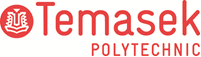

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : NG FENG KANG MALCOLM (2401779J)
* Tutorial Group                :  TC16
* Tutor						    :  MR EMILE SEBESTIAN
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
# Import necessary libraries for data analysis and visualization. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding

Mental health issues such as depression are getting increasingly common among students and can negatively affect their academic performance, social relationships, and overall well-being. However, many students who are experiencing mental health issues are not identified early enough to receive appropriate support. Without support for their mental health, dangerous issues may arise. 

The purpose of this data science project is to analyze students’ mental health through survey data to understand the prevalence and severity of depression and anxiety among students and to identify factors that may be associated with higher mental health risk.
Specifically, this project aims to:

1. Determine the distribution of depression (PHQ-9) among students, explore relationships between mental health scores and student-related factors such as academic workload, sleep patterns, and demographics as well as support early identification of students who may be at moderate to severe mental health risk. 

2. The insights gained from this analysis can help educational institutions and counselors design targeted mental health interventions, allocate support resources effectively, and promote student well-being by predicting the depression scores of students.


# 2. Data Understanding

## 2.1 Load dataset

In [3]:
df = pd.read_csv('students_mental_health_survey.csv')
df

,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,1,25,Others,Male,3.56,3,3,2,Good,Moderate,...,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,2,24,Engineering,Female,2.44,0,3,0,Average,Low,...,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,3,19,Business,Female,3.74,4,0,3,Good,Low,...,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,4,19,Computer Science,Male,3.65,2,1,0,Average,Low,...,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,5,18,Business,Male,3.40,3,3,4,Good,Low,...,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,7018,20,Law,Female,3.69,3,1,5,Good,Low,...,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,7019,24,Medical,Female,3.73,3,4,1,Good,Moderate,...,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,7020,26,Others,Male,3.65,4,5,1,Good,High,...,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,7021,24,Medical,Male,3.65,4,3,4,Average,High,...,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


#### Comments (2.1): 
I loaded the dataset containing the survey responses related to student's mental health. As seen from the dataset, there are 7022 rows and 18 columns. 

## 2.2 Summary Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7022 non-null   int64  
 1   Age                          7022 non-null   int64  
 2   Course                       7022 non-null   object 
 3   Gender                       7022 non-null   object 
 4   CGPA                         7010 non-null   float64
 5   Stress_Level                 7022 non-null   int64  
 6   Depression_Score             7022 non-null   int64  
 7   Anxiety_Score                7022 non-null   int64  
 8   Sleep_Quality                7022 non-null   object 
 9   Physical_Activity            7022 non-null   object 
 10  Diet_Quality                 7022 non-null   object 
 11  Social_Support               7022 non-null   object 
 12  Relationship_Status          7022 non-null   object 
 13  Substance_Use     

#### Comments: 
For df.info(), this is used to get information of the DataFrame including data types and non-null counts. As seen from the statistics, there are datatypes (floats, integers & objects). 

In [5]:
# Get summary statistics and data distribution for all columns in the dataset based on mean, median, mode, standard deviation, minimum, maximum, and percentiles.
df.describe(include='all')


,ID,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,...,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
count,7022.000000,7022.000000,7022,7022,7010.00000,7022.000000,7022.000000,7022.000000,7022,7022,...,7022,7022,7007,7022,7022,7022,7022.000000,7022,7022.000000,7022
unique,NaN,NaN,6,2,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,2,2,NaN,3,NaN,3
top,NaN,NaN,Medical,Male,NaN,NaN,NaN,NaN,Good,Moderate,...,Moderate,Single,Never,Never,No,No,NaN,Moderate,NaN,On-Campus
freq,NaN,NaN,2105,3547,NaN,NaN,NaN,NaN,3589,3521,...,3470,3574,5903,4263,4866,6678,NaN,3440,NaN,2815
mean,3511.500000,23.003418,NaN,NaN,3.49127,2.427941,2.254486,2.300484,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.453005,NaN,22.010538,NaN
std,2027.221128,3.853978,NaN,NaN,0.28742,1.638408,1.625193,1.624305,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.708995,NaN,4.358380,NaN
min,1.000000,18.000000,NaN,NaN,2.44000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,15.000000,NaN
25%,1756.250000,20.000000,NaN,NaN,3.29000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,18.000000,NaN
50%,3511.500000,22.000000,NaN,NaN,3.50000,2.000000,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,22.000000,NaN
75%,5266.750000,25.000000,NaN,NaN,3.70000,4.000000,3.000000,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,26.000000,NaN


In [6]:
## Used to understand the different data type for each column
df.dtypes 

ID                               int64
Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

In [7]:
## Used to check for missing values in each column. 
df.isna().sum()

ID                              0
Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

There are missing values for CGPA & Substance Use 

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

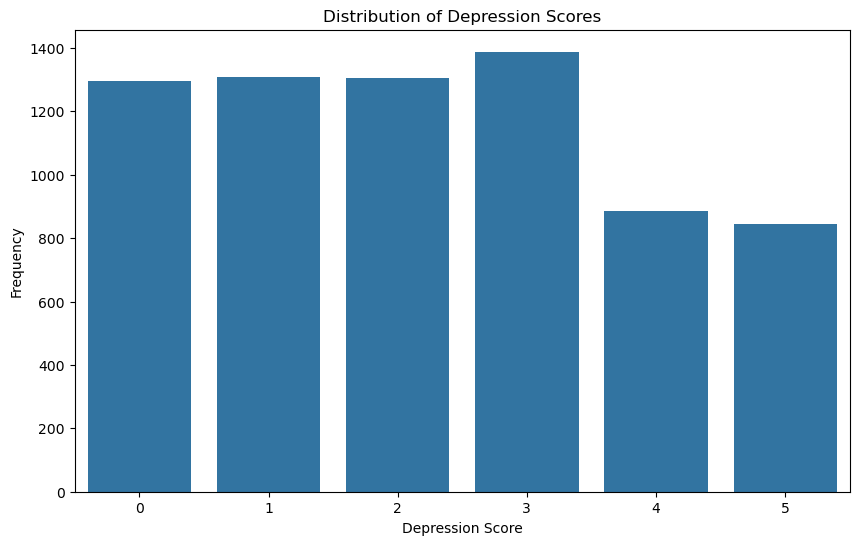

In [8]:
## Understanding distribution of target
col_y = 'Depression_Score' # This is the target variable, depression score.
plt.figure(figsize=(10, 6))
sns.barplot(x=df[col_y].value_counts().index, y=df[col_y].value_counts().values)
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.show()

### 2.3.1.2 Understanding distribution of features

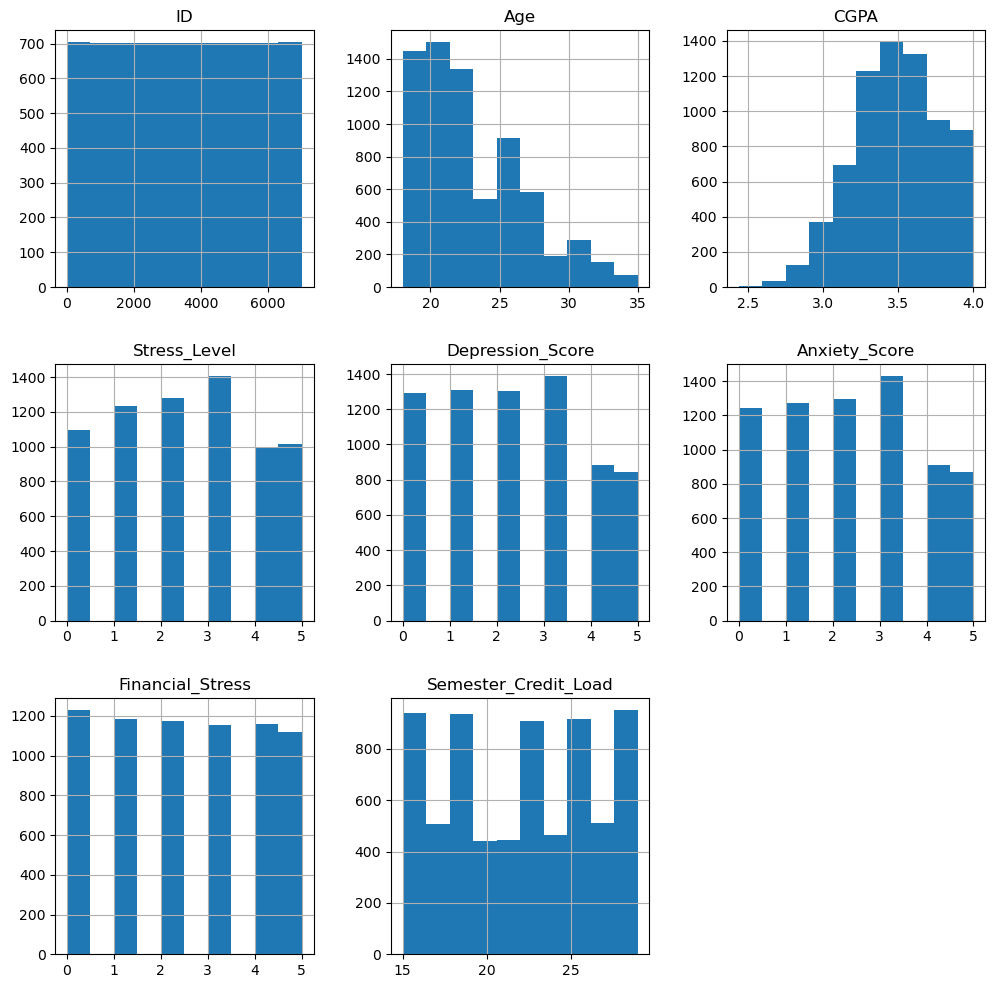

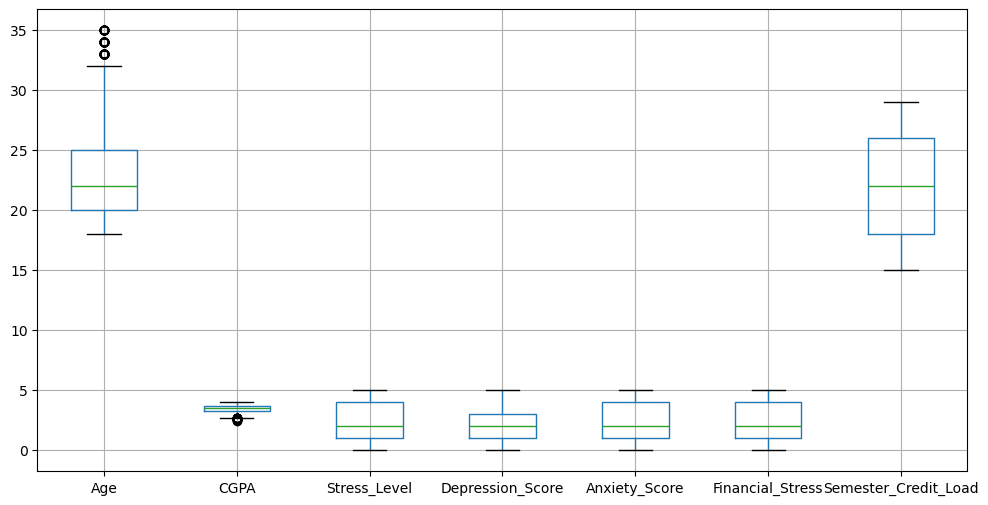

In [ ]:
df = df.drop('ID', axis=1)
df.hist(figsize=(12,12))
plt.show()
plt.figure(figsize=(12,6))
df.boxplot()
plt.show()

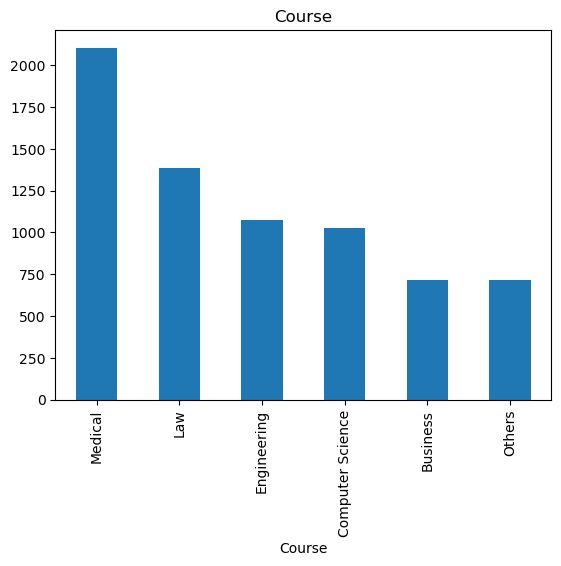

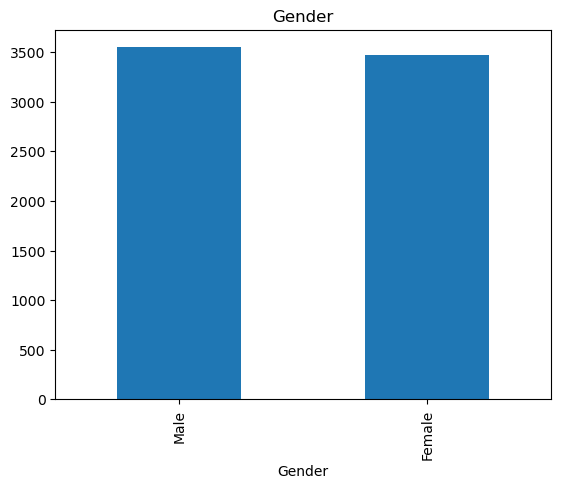

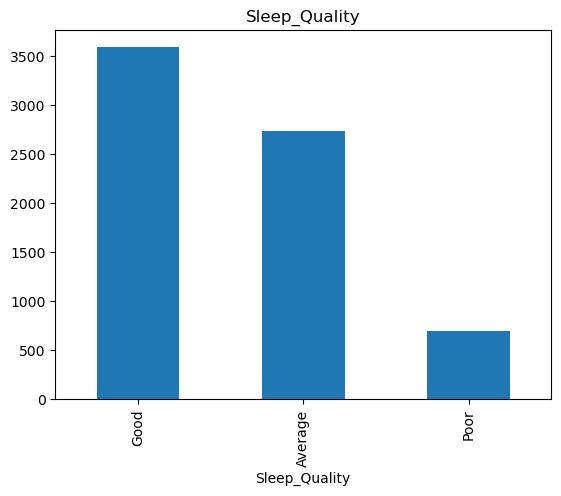

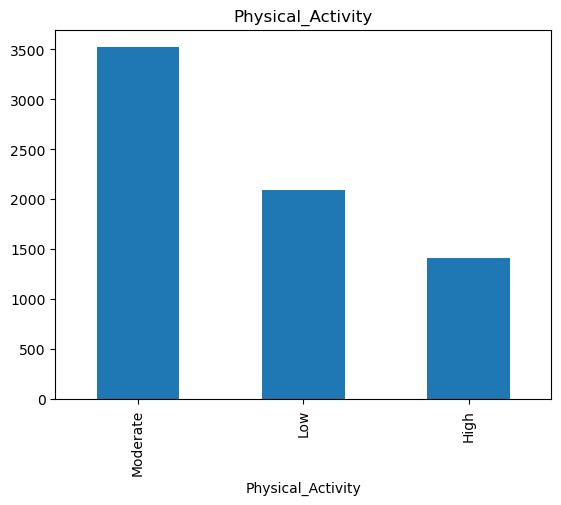

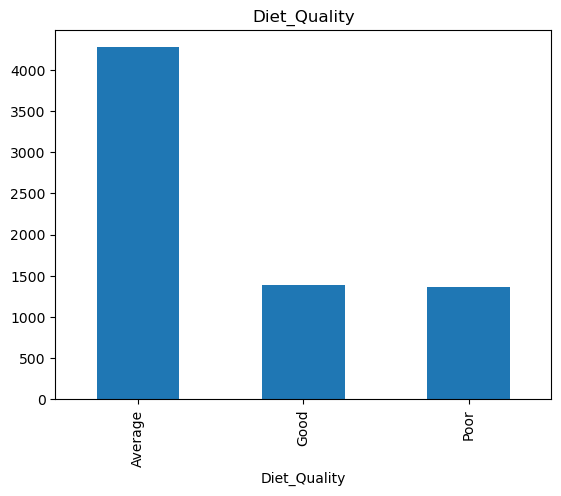

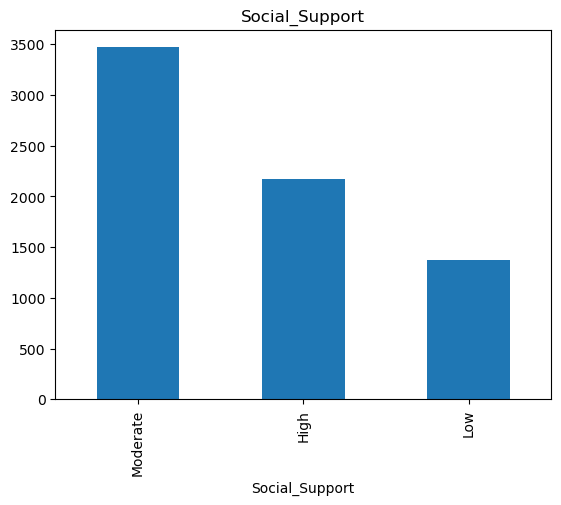

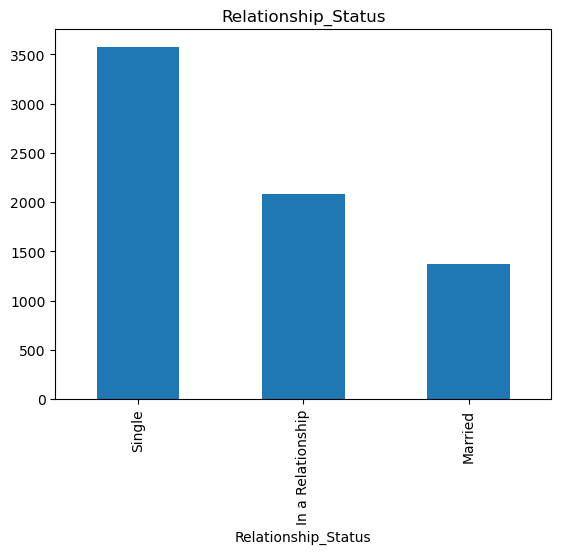

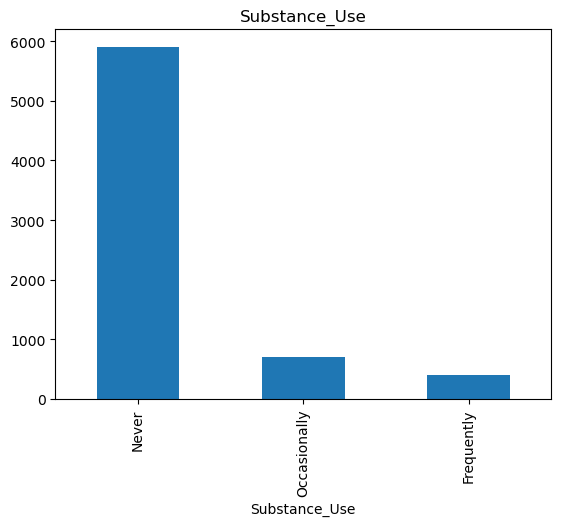

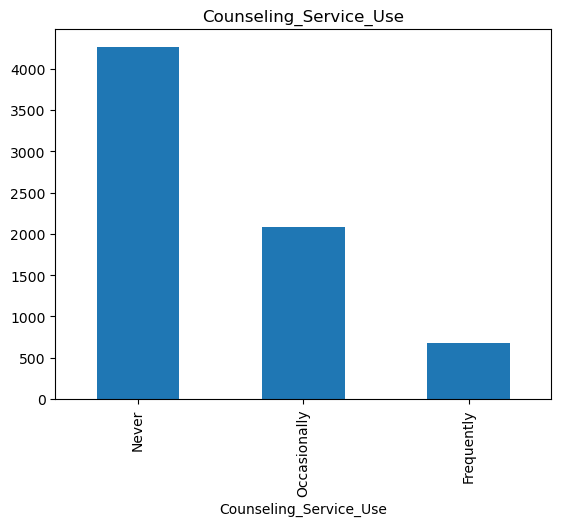

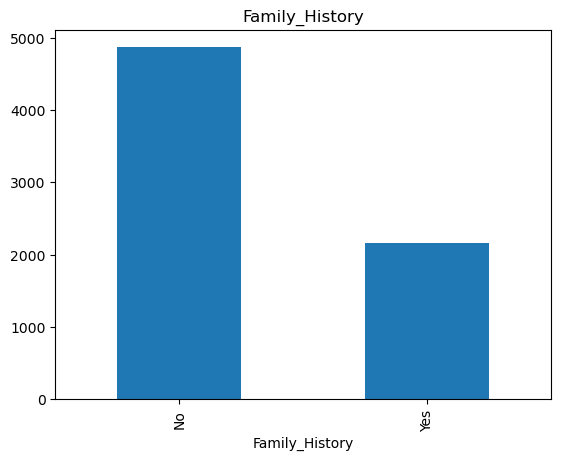

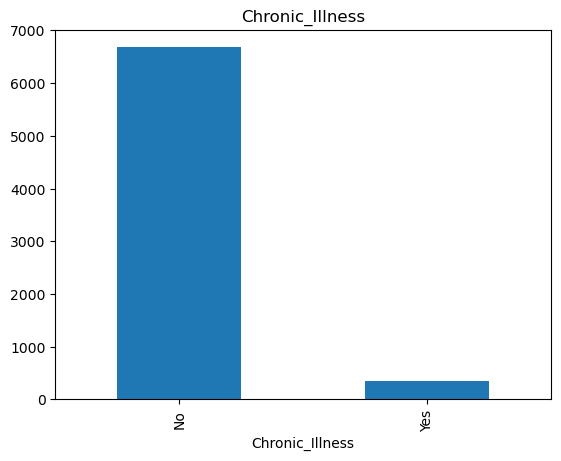

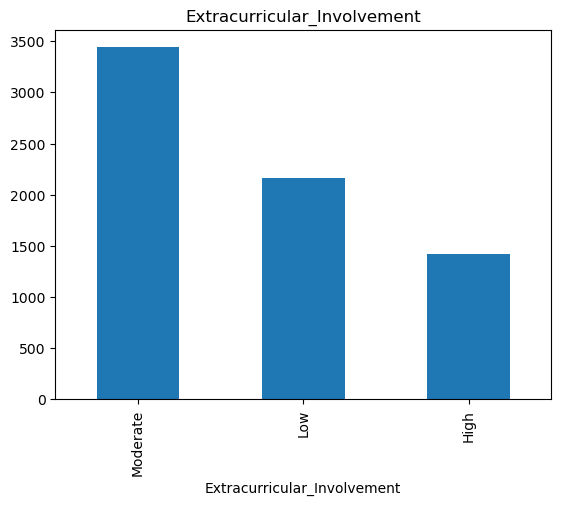

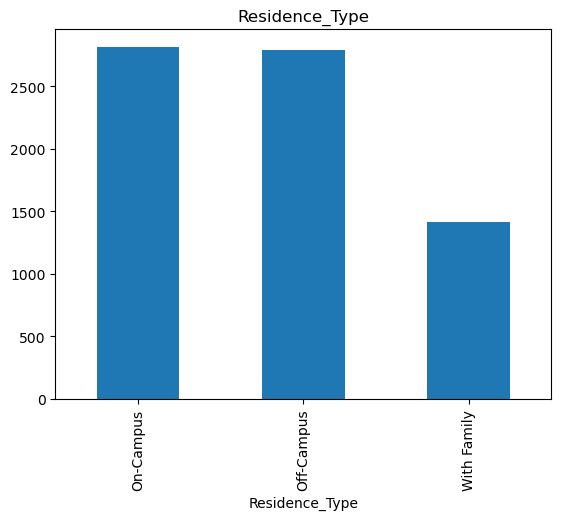

In [ ]:
for col in df.select_dtypes(include='object'):
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

KeyError: "[('Never', 'Occasionally', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Frequently', nan, nan, 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', nan, 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Frequently', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Occasionally', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Occasionally', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Occasionally', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Occasionally', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Frequently', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Frequently', nan, 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Occasionally', 'Never', 'Never', 'Never', nan, 'Occasionally', 'Occasionally', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', nan, 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Frequently', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Occasionally', 'Never', 'Frequently', 'Never', 'Never', 'Never', nan, 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never', 'Occasionally', 'Never', 'Never', 'Never', 'Never', 'Never', nan, 'Never', 'Frequently', 'Never', 'Never', 'Never', 'Never', 'Never', 'Never'), (3.56, 2.44, 3.74, 3.65, 3.4, 3.35, 3.65, 3.4, 3.8, 3.05, 3.74, nan, 3.19, 3.26, 3.2, 3.61, 3.85, 3.26, 3.46, 3.43, 3.38, 3.56, 3.5, 3.6, 3.08, 3.6, 3.88, 3.43, 3.21, 3.62, 3.16, 3.71, 3.38, 3.48, 3.27, 3.41, 3.22, 3.16, 3.71, 3.65, 3.33, 3.01, 3.97, 4.0, 3.62, 3.63, 2.99, 3.11, 3.02, 3.66, 3.09, nan, 3.12, 3.82, 3.23, 3.7, 2.95, 3.6, 3.73, 3.63, 3.64, 3.79, 3.59, 3.62, 4.0, 3.34, 3.59, 3.87, 4.0, 3.24, 3.82, 3.44, 3.09, 3.1, nan, 3.25, 3.73, 3.53, 3.0, 3.73, 3.79, 4.0, 3.29, 3.0, 3.46, 2.98, 3.29, 3.04, 4.0, 4.0, 3.51, 3.6, 4.0, 3.75, 3.33, 3.61, 4.0, 3.86, 3.12, 3.78, 3.77, 3.72, 3.26, 3.45, 3.97, 3.06, 3.05, 3.84, 3.92, 3.43, 3.53, 3.44, 3.71, 3.01, 3.28, 4.0, 2.86, 3.64, 3.1, 3.59, 3.12, 3.37, 3.78, 3.62, 3.28, 3.64, 3.65, 3.09, 3.75, 3.77, 3.33, 3.54, 3.12, 3.73, 3.26, 3.41, 3.31, 3.51, 3.19, 3.72, 3.94, 3.9, 3.52, 3.32, 3.14, 3.26, 3.37, 3.63, 3.5, 3.84, 4.0, 3.68, 2.85, 3.7, 2.91, 3.38, 3.41, 3.99, 3.81, 3.07, 3.82, 3.35, 3.71, 3.3, 3.48, 3.73, 3.39, 3.42, 3.55, 2.94, 3.25, 3.81, 3.93, 3.36, 3.12, 3.87, 3.67, 3.39, 3.91, 3.8, 3.56, 3.49, 3.75, 3.06, 3.43, 3.28, 3.11, 2.85, 3.19, 3.8, 3.58, 3.61, 3.11, 3.71, 3.81, 3.26, 3.22, 3.21, 3.6, 4.0, 3.34, 3.33, 3.5, 3.13, 3.69, 3.62, 3.08, 3.98, 3.47, 3.47, 3.49, 3.49, 3.63, 3.05, 2.98, 3.28, 3.24, 2.92, 3.4, 3.08, 3.91, 3.53, 3.07, 3.82, 3.15, 3.53, 3.39, 3.38, 2.79, 3.34, 3.24, 3.01, 3.7, 3.52, 3.37, 3.26, 3.35, 3.63, 3.63, 3.63, 3.13, 3.72, 3.49, 3.83, 3.54, 3.93, 3.16, 3.23, 3.78, 3.84, 3.81, 3.47, 3.5, 3.37, 3.72, 3.6, 3.42, 3.79, 4.0, 3.57, 3.14, 3.86, 3.37, 3.3, 3.46, 3.6, 3.71, 3.19, 3.87, 3.07, 3.15, 3.56, 3.22, 3.38, 3.33, 3.89, 3.47, 2.97, 3.19, 3.41, 3.51, 3.88, 3.21, 3.47, 3.34, 3.68, 3.56, 3.35, 3.41, 3.4, 3.5, 4.0, 3.76, 3.66, 3.49, 3.78, 3.55, 3.83, 3.54, 3.17, 3.65, 3.52, 2.86, 3.76, 3.4, 3.07, 3.33, 3.4, 3.63, 3.05, 3.84, 3.65, 3.93, 3.63, 3.28, 3.25, 3.69, 3.15, 3.87, 3.34, 3.48, 3.4, 3.41, 4.0, 3.55, 3.03, 3.54, 3.45, 3.52, 3.94, 3.42, 3.29, 3.27, 3.25, 3.68, 3.54, 3.6, 3.42, 3.44, 3.37, 3.69, 4.0, 3.08, 3.13, 3.72, 3.49, 3.82, 3.58, 3.22, 3.14, 3.32, 3.47, 3.55, 3.63, 3.43, 3.29, 3.64, 3.74, 3.69, 3.73, 3.5, 3.03, 3.23, 3.65, 3.82, 3.69, 3.97, 3.22, 3.93, 2.77, 3.24, 3.33, 3.63, 3.6, 3.3, 3.54, 3.68, 3.73, 3.59, 3.7, 3.49, 3.82, 3.19, 3.99, 3.79, 3.31, 3.73, 3.23, 3.45, 3.37, 2.87, 3.68, 3.46, 3.47, 3.45, 3.44, 3.11, 3.23, 3.9, 2.87, 3.63, 3.49, 3.7, 2.91, 3.79, 3.23, 3.12, 3.49, 3.93, 3.69, 2.64, 3.34, 3.26, 3.41, 3.57, 3.52, 3.33, 3.93, 4.0, 3.52, 2.97, 4.0, 3.3, 3.17, 4.0, 3.28, 3.11, 3.5, 2.84, 2.98, 4.0, 3.79, 3.84, 3.59, 3.24, 3.77, 3.3, 4.0, 3.65, 3.55, 3.59, 3.47, 3.67, 3.08, 3.39, 3.5, 3.48, 3.32, 3.97, 3.56, 2.88, 3.42, 3.51, 3.83, 4.0, 3.78, 3.46, 3.6, 3.59, 3.23, 2.84, 3.52, 3.68, 3.59, 3.39, 3.32, 3.25, 3.26, 3.49, 3.35, 4.0, 3.35, 3.3, 3.89, 3.43, 3.64, 3.49, 4.0, 3.99, 3.36, 3.58, 3.88, 3.52, 4.0, 3.14, 2.8, 3.4, 3.55, 2.94, 3.75, 3.73, 3.71, 3.39, 3.03, 3.51, 3.4, 3.62, 3.19, 3.47, 3.36, 3.57, 3.7, 4.0, 3.75, 3.54, 4.0, 3.69, 3.21, 3.37, 3.76, 3.78, 3.5, 3.3, 3.49, 3.49, 3.33, 3.72, 3.51, 3.34, 3.49, 3.54, 3.61, 3.7, 2.95, 3.65, 3.41, 3.75, 3.94, 3.67, 3.46, 3.18, 4.0, 3.61, 3.14, 3.22, 3.85, 2.88, 3.89, 3.3, 3.51, 4.0, 3.55, 3.15, 3.3, 3.24, 3.67, 3.36, 3.75, 3.22, 2.89, 3.54, 3.71, 3.23, 3.79, 3.46, 3.37, 3.44, 3.34, 2.82, 3.73, 2.98, 3.31, 4.0, 3.83, 3.21, 3.59, 3.65, 3.24, 3.56, 3.09, 3.19, 3.57, 3.01, 3.7, 3.78, 4.0, 3.63, 3.13, 3.55, 3.02, 2.97, 3.38, 2.73, 3.35, 3.26, 3.36, 3.59, 3.3, 3.33, 3.64, 3.63, 3.53, 3.89, 3.12, 2.92, 3.38, 3.75, 3.34, 3.5, 3.55, 3.84, 3.33, 3.36, 3.44, 3.11, 3.15, 3.78, 3.23, 3.28, 3.43, 2.88, 3.48, 3.88, 3.5, 4.0, 3.51, 3.16, 3.68, 3.36, 3.09, 3.78, 3.53, 3.25, 3.37, 3.51, 3.43, 2.96, 3.66, 3.46, 3.51, 2.84, 3.46, 3.51, 3.74, 3.77, 3.71, 3.59, 3.07, 3.3, 3.45, 3.44, 3.67, 3.58, 3.33, 3.28, 3.86, 3.17, 3.44, 3.2, 3.33, 3.48, 3.57, 3.5, 3.21, 3.55, 3.72, 3.46, 3.84, 3.24, 3.43, 3.33, 3.61, 3.7, 3.16, 3.19, 3.48, 3.25, 3.32, 3.93, 3.6, 3.34, 3.03, 3.29, 3.05, 3.3, 3.59, 3.39, 3.37, 3.96, 3.82, 2.97, 3.65, 3.73, 3.08, 3.42, 3.45, 3.69, 3.73, 3.37, 3.3, 3.13, 3.73, 3.28, 3.51, 3.67, 3.62, 3.58, 3.65, 3.99, 3.37, 3.51, 3.74, 3.63, 3.73, 3.68, 3.22, 2.95, 3.78, 3.24, 3.65, 3.9, 3.87, 3.17, 3.52, 3.37, 3.93, 3.49, 3.25, 3.56, 3.31, 4.0, 3.87, 3.46, 3.69, 3.26, 3.14, 3.74, 3.24, 3.51, 3.52, 3.47, 3.68, 3.87, 3.14, 3.36, 3.28, 3.19, 3.26, 3.3, 3.82, 3.68, 3.89, 2.83, 3.38, 3.76, 3.67, 3.83, 3.35, 3.41, 3.77, 3.63, 3.99, 3.15, 3.58, 3.0, 3.48, 3.81, 3.9, 3.04, 3.11, 3.54, 2.89, 3.19, 3.66, 3.51, 3.56, 3.84, 3.15, 3.78, 3.41, 3.68, 3.45, 3.75, 3.7, 3.12, 3.86, 3.28, 3.8, 3.66, 3.4, 3.42, 4.0, 3.06, 3.65, 3.55, 3.78, 4.0, 3.53, 3.61, 3.42, 3.45, 3.35, 3.86, 3.9, 3.52, 2.98, 3.8, 3.65, 3.89, 3.35, 3.28, 3.72, 3.83, 3.62, 3.68, 4.0, 3.48, 3.41, 3.57, 3.92, 3.39, 2.97, 3.55, 3.5, 3.51, 3.31, 3.78, 3.34, 4.0, 3.78, 3.94, 3.23, 3.33, 3.24, 3.45, 3.35, 3.72, 3.33, 3.28, 4.0, 3.45, 3.25, 3.43, 3.79, 3.37, 3.02, 2.7, 3.3, 3.55, 3.43, 3.09, 3.62, 3.36, 3.59, 3.35, 3.36, 3.55, 3.74, 3.33, 3.93, 3.52, 3.03, 3.15, 3.92, 3.71, 3.59, 3.82, 3.32, 3.22, 3.56, 3.66, 3.01, 3.39, 3.08, 3.39, 3.63, 3.4, 3.47, 3.78, 3.53, 3.96, 3.73, 3.29, 3.03, 3.33, 3.45, 3.72, 3.36, 3.42, 3.29, 3.65, 3.21, 3.3, 3.6, 3.3, 3.7, 3.82, 3.24, 3.41, 3.54, 3.17, 3.31, 3.75, 3.45, 3.22, 3.18, 3.43, 3.78, 3.61, 3.41, 3.95, 3.14, 3.5, 3.31, 3.7, 3.55, 3.16, 3.57, 3.11, 3.6, 3.55, 3.61, 3.18, 3.23, 3.58, 3.2, 3.56, 3.26, 3.64, 3.56, 3.61, 3.24, 3.43, 3.4, 4.0, 3.21, 2.88, 3.37, 3.34, 3.65, 3.64, 3.78, 3.87, 4.0, 3.64, 3.55, 3.51, 3.16, 3.24, 3.08, 3.8, 3.68, 2.76, 3.95, 3.45, 3.65, 3.32, 3.68, 3.52, 3.67, 4.0, 4.0, 3.72, 3.63, 3.74, 3.46, 3.54, 3.6, 3.33, 3.71, 3.37, 4.0, 3.52, 3.66, 3.78, 3.51, 3.46, 3.23, 3.35, 3.76, 3.5, 3.68, 3.52, 3.39, 3.86, 3.8, 3.48, 3.17, 3.65, 3.42, 3.73, 3.48, 3.73, 3.82, 3.6, 3.27, 3.43, 3.76, 3.54, 3.3, 3.78, 3.77, 4.0, 3.55, 2.94, 3.44, 4.0, 3.38, 3.71, 3.48, 3.2, 3.32, 3.61, 3.77, 3.21, 3.58, 3.47, 3.41, 3.73, 3.89, 3.63, 3.11, 4.0, 3.21, 3.76, 3.36, 3.47, 3.23, 3.4, 3.95, 3.51, 3.91, 3.95, 3.5, 3.62, 3.42, 2.68, 3.59, 3.32, 3.87, 3.6, 3.56, 3.94, 3.56, 3.58, 3.46, 3.32, 3.52, 3.06, 3.19, 4.0, 3.41, 3.76, 3.86, 3.76, 2.95, 3.61, 3.53, 3.5, 2.94, 3.53, 3.4, 3.62, 3.27, 3.25, 3.63, 3.41, 3.66, 2.87, 4.0, 3.4, 3.48, 3.5, 3.13, 3.13, 3.67, 3.91, 3.69, 3.66, 3.34, 3.84, 3.19, 3.19, 3.64, 3.59, 3.89, 3.27, 3.49, 3.58, 3.52, 3.45, 3.72, 3.37, 2.93, 3.72, 3.42, 3.56, 3.56, 3.51, 3.75, 3.59, 3.4, 3.76, 3.26, 3.22, 3.16, 3.37, 3.29, 3.82, 3.36, 3.46, 3.73, 3.8, 3.08, 3.62, 3.74, 3.37, 3.75, 3.59, 3.71, 3.66, 3.1, 3.4, 3.64, 3.44, 3.51, 3.62, 3.42, 3.87, 3.25, 2.98, 4.0, 3.65, 2.98, 3.69, 3.93, 3.74, 3.51, 3.23, 3.94, 3.42, 3.61, 3.91, 3.2, 3.43, 3.4, 2.96, 3.64, 2.9, 3.85, 3.63, 3.57, 3.45, 3.81, 3.79, 3.6, 3.06, 3.95, 3.97, 3.28, 3.09, 3.44, 3.12, 3.84, 3.97, 3.48, 4.0, 3.27, 3.57, 3.26, 3.76, 3.43, 3.76, 3.44, 3.64, 3.14, 3.87, 3.55, 3.85, 3.76, 3.97, 3.48, 3.86, 3.6, 3.1, 3.96, 3.23, 3.86, 3.63, 3.67, 3.92, 3.29, 3.71, 3.17, 3.48, 3.37, 3.24, 3.33, 3.77, 4.0, 3.76, 2.96, 3.49, 3.98, 3.51, 3.72, 3.51, 3.57, 3.67, 4.0, 3.21, 3.63, 3.68, 3.65, 3.74, 3.27, 2.91, 3.72, 4.0, 3.89, 3.4, 3.87, 3.63, 3.37, 3.83, 3.1, 3.5, 3.48, 3.88, 4.0, 4.0, 3.22, 4.0, 3.7, 3.27, 3.27, 4.0, 3.43, 3.5, 3.67, 3.45, 3.63, 3.65, 3.8, 4.0, 3.63, 3.9, 3.28, 3.2, 2.97, 3.81, 3.27, 2.86, 3.9, 2.92, 3.51, 3.24, 3.21, 3.96, 3.62, 3.28, 3.42, 3.69, 3.21, 3.55, 3.49, 3.97, 3.47, 3.54, 3.63, 3.09, 3.47, 3.67, 3.81, 3.63, 3.01, 3.14, 3.1, 3.5, 3.57, 2.84, 3.17, 3.38, 3.3, 3.31, 3.03, 3.35, 3.05, 3.29, 3.47, 2.96, 3.98, 3.46, 3.39, 3.72, 3.57, 3.37, 3.32, 3.31, 3.52, 3.36, 3.69, 3.27, 3.45, 3.66, 4.0, 3.62, 3.11, 2.98, 3.73, 4.0, 3.37, 3.4, 3.61, 3.61, 3.77, 3.48, 3.55, 3.36, 3.08, 3.63, 3.67, 3.19, 3.03, 3.43, 3.74, 3.35, 3.14, 3.17, 3.32, 3.72, 3.68, 3.24, 3.76, 3.74, 3.51, 3.75, 4.0, 3.34, 3.34, 3.57, 3.46, 3.42, 3.61, 3.07, 3.64, 3.43, 3.78, 3.51, 3.8, 2.7, 3.6, 3.45, 3.06, 3.37, 3.34, 3.58, 3.57, 3.56, 3.89, 3.32, 3.39, 3.4, 3.65, 3.56, 3.67, 3.8, 3.03, 3.39, 3.83, 3.12, 3.67, 3.79, 3.89, 3.19, 3.12, 3.72, 3.57, 3.28, 4.0, 3.76, 3.34, 3.66, 3.38, 3.34, 3.77, 3.71, 3.16, 3.34, 4.0, 3.58, 3.58, 3.36, 3.49, 3.39, 3.3, 3.57, 3.33, 3.29, 3.4, 4.0, 3.25, 2.88, 3.22, 3.97, 3.31, 3.48, 3.51, 3.22, 3.86, 3.22, 3.69, 3.56, 3.66, 3.49, 3.5, 3.41, 2.96, 3.16, 3.65, 3.05, 3.55, 3.58, 3.56, 3.31, 3.45, 3.79, 3.07, 4.0, 3.04, 3.5, 3.51, 3.48, 3.57, 3.17, 3.05, 3.44, 3.48, 3.73, 3.17, 3.53, 3.58, 3.18, 3.86, 3.54, 3.1, 3.67, 3.55, 3.66, 2.98, 3.45, 3.65, 3.2, 3.43, 3.26, 3.11, 3.22, 3.32, 3.2, 3.56, 3.42, 3.4, 3.25, 3.25, 3.46, 3.32, 3.31, 3.47, 3.54, 3.59, 2.65, 3.01, 4.0, 2.99, 3.77, 3.41, 3.47, 3.73, 3.67, 3.41, 3.11, 3.51, 3.32, 3.77, 3.01, 3.65, 3.29, 3.56, 4.0, 3.33, 4.0, 3.23, 3.29, 4.0, 3.21, 3.63, 3.32, 3.45, 3.55, 3.29, 3.27, 3.77, 3.62, 2.98, 3.69, 3.58, 3.66, 3.83, 3.43, 3.1, 3.64, 2.93, 3.16, 3.33, 3.61, 3.34, 3.38, 3.11, 3.39, 4.0, 3.92, 3.49, 3.54, 3.2, 3.46, 3.36, 3.7, 3.57, 3.71, 3.67, 3.19, 3.61, 3.51, 3.48, 3.52, 3.39, 3.47, 3.01, 3.56, 3.01, 3.78, 3.14, 3.75, 3.31, 3.65, 3.52, 3.15, 3.54, 3.42, 3.41, 3.72, 3.68, 3.62, 3.3, 3.67, 4.0, 3.37, 3.41, 3.78, 3.44, 3.69, 3.42, 3.81, 4.0, 3.96, 3.67, 3.63, 3.87, 3.6, 2.94, 3.55, 2.91, 4.0, 3.47, 3.4, 3.32, 3.59, 3.9, 3.03, 3.4, 3.06, 3.2, 3.72, 3.42, 3.48, 3.61, 3.39, 2.7, 3.81, 3.46, 3.59, 3.16, 3.53, 3.54, 3.66, 3.59, 3.45, 3.63, 3.59, 3.61, 3.58, 3.92, 3.15, 3.21, 3.37, 3.35, 3.02, 3.33, 3.75, 3.94, 2.95, 3.25, 3.56, 3.68, 3.52, 3.8, 2.91, 3.83, 3.93, 3.69, 3.49, 3.52, 3.52, 3.01, 2.81, 3.45, 3.34, 3.29, 3.13, 3.32, 4.0, 4.0, 3.51, 4.0, 3.62, 3.79, 3.45, 3.38, 3.23, 3.3, 3.95, 3.42, 3.52, 3.48, 3.19, 4.0, 3.69, 3.69, 3.61, 4.0, 3.13, 3.66, 3.69, 3.54, 3.21, 3.32, 3.61, 3.66, 3.35, 3.69, 3.63, 3.11, 3.16, 3.24, 3.1, 3.3, 3.83, 3.31, 3.27, 3.25, 2.92, 3.36, 3.41, 4.0, 3.6, 3.47, 3.53, 3.4, 3.42, 3.38, 3.85, 3.59, 3.13, 3.57, 4.0, 3.52, 3.93, 3.77, 3.58, 3.87, 3.46, 3.31, 3.28, 3.62, 3.28, 4.0, 3.78, 3.32, 3.35, 3.82, 3.68, 3.64, 3.27, 3.5, 3.27, 2.93, 3.49, 3.6, 3.33, 3.68, 3.71, 3.11, 3.33, 3.45, 3.18, 3.55, 3.63, 3.07, 3.52, 3.36, 3.75, 3.7, 3.59, 3.17, 3.13, 3.32, 3.18, 3.12, 3.66, 3.38, 2.69, 3.66, 3.92, 3.36, 3.8, 3.3, 3.77, 3.43, 3.58, 3.83, 3.61, 3.15, 3.25, 2.93, 3.6, 3.59, 3.44, 4.0, 3.46, 3.94, 3.16, 3.8, 4.0, 3.09, 3.2, 3.16, 3.68, 3.59, 3.68, 3.34, 3.35, 3.79, 3.39, 3.22, 3.45, 3.2, 3.19, 3.33, 3.62, 3.23, 3.54, 3.68, 3.41, 3.38, 3.33, 3.51, 3.18, 3.69, 3.87, 3.62, 3.88, 3.34, 3.27, 3.13, 3.3, 3.38, 3.41, 3.94, 3.24, 3.82, 3.82, 3.57, 3.29, 3.41, 3.65, 3.82, 2.93, 3.46, 3.37, 3.93, 3.6, 3.4, 4.0, 3.11, 3.13, 4.0, 3.33, 3.65, 2.87, 3.47, 3.31, 3.55, 3.5, 3.58, 2.94, 3.58, 3.73, 3.29, 3.3, 3.62, 3.5, 3.56, 3.14, 3.35, 3.54, 2.6, 3.79, 3.86, 3.47, 3.42, 3.46, 3.38, 3.75, 3.71, 3.24, 3.56, 3.4, 3.23, 3.58, 3.31, 3.46, 3.39, 3.31, 3.96, 3.37, 3.22, 3.51, 3.85, 3.43, 3.78, 3.29, 2.96, 3.62, 3.87, 2.98, 3.36, 3.57, 3.29, 3.35, 3.54, 3.24, 3.47, 4.0, 3.21, 4.0, 3.39, 3.43, 3.53, 3.49, 3.05, 3.67, 3.73, 3.07, 3.38, 3.42, 3.18, 3.78, 3.05, 3.96, 3.72, 3.68, 2.95, 3.12, 3.66, 3.82, 3.83, 3.51, 3.3, 3.43, 3.62, 3.79, 3.48, 3.22, 3.51, 3.54, 3.72, 3.36, 3.37, 3.66, 3.28, 3.77, 3.65, 3.51, 3.68, 3.62, 3.79, 3.69, 3.33, 3.66, 3.18, 3.65, 3.78, 3.48, 3.45, 3.31, 3.42, 3.54, 3.69, 3.83, 3.54, 3.31, 3.35, 3.49, 3.75, 3.46, 3.69, 3.61, 3.41, 3.16, 3.19, 3.37, 3.94, 3.04, 3.78, 3.41, 3.95, 3.77, 3.28, 3.93, 2.98, 3.4, 3.67, 3.31, 2.89, 3.91, 3.58, 3.08, 3.04, 3.29, 3.49, 3.41, 3.54, 3.87, 3.22, 3.25, 4.0, 3.19, 3.08, 3.79, 3.88, 3.75, 3.54, 3.33, 3.45, 3.81, 3.32, 3.46, 3.74, 3.44, 3.95, 3.74, 3.31, 3.4, 2.88, 3.66, 3.32, 3.19, 3.38, 3.24, 3.9, 3.44, 4.0, 3.71, 3.16, 3.61, 3.82, 3.55, 3.59, 3.39, 3.47, 3.99, 3.52, 3.73, 3.52, 3.69, 3.55, 3.37, 3.54, 3.17, 3.61, 3.04, 3.83, 3.74, 3.47, 3.55, 2.8, 3.28, 3.44, 4.0, 3.17, 2.89, 3.2, 3.58, 3.24, 3.8, 3.68, 3.25, 3.66, 3.31, 3.69, 3.61, 3.33, 4.0, 3.12, 3.11, 3.58, 3.87, 3.36, 3.5, 3.65, 2.93, 3.39, 3.36, 3.58, 3.87, 3.99, 3.75, 3.12, 3.74, 3.86, 3.32, 3.68, 3.2, 3.22, 4.0, 3.53, 3.48, 3.31, 3.53, 3.7, 3.79, 3.46, 3.38, 3.47, 3.35, 3.07, 2.98, 3.43, 3.56, 3.75, 3.58, 3.84, 3.64, 3.29, 3.23, 3.18, 3.02, 3.59, 3.14, 3.89, 3.53, 3.69, 3.53, 3.59, 3.6, 3.11, 3.51, 3.74, 4.0, 3.74, 3.25, 3.43, 3.69, 3.79, 3.89, 3.03, 4.0, 3.51, 3.35, 3.32, 3.51, 3.66, 3.15, 3.5, 4.0, 4.0, 4.0, 3.77, 3.15, 3.32, 3.35, 3.39, 3.34, 3.61, 3.78, 3.02, 3.57, 3.61, 3.8, 3.34, 2.96, 3.09, 3.4, 2.58, 3.29, 3.14, 3.42, 3.78, 3.08, 3.71, 3.72, 3.56, 3.06, 3.37, 3.8, 3.64, 3.24, 3.6, 3.78, 3.4, 3.48, 3.53, 3.32, 3.13, 3.71, 3.75, 3.43, 3.62, 2.94, 3.78, 3.19, 3.66, 3.99, 3.81, 3.76, 3.1, 4.0, 3.19, 3.27, 3.1, 3.7, 3.37, 3.48, 3.03, 3.98, 3.4, 3.49, 3.76, 3.59, 3.04, 2.84, 3.74, 3.61, 3.43, 3.88, 3.26, 3.48, 3.34, 3.95, 3.54, 3.19, 3.73, 3.58, 2.93, 3.62, 3.17, 3.2, 3.66, 3.04, 3.58, 3.44, 3.58, 3.21, 3.4, 3.17, 2.91, 3.21, 3.43, 3.44, 3.7, 3.81, 3.86, 3.42, 3.71, 3.64, 4.0, 3.52, 3.99, 3.53, 3.5, 3.26, 3.29, 3.5, 3.09, 3.44, 3.45, 3.03, 3.49, 3.76, 2.96, 3.39, 3.28, 3.22, 3.36, 3.22, 3.19, 2.9, 3.43, 3.78, 3.87, 3.39, 3.3, 3.57, 3.46, 3.4, 3.86, 3.8, 3.89, 3.05, 3.89, 3.53, 4.0, 3.33, 3.51, 3.52, 3.23, 3.69, 3.55, 3.7, 3.85, 3.77, 3.42, 3.54, 3.3, 3.94, 3.02, 3.57, 3.1, 3.81, 3.56, 3.07, 3.66, 3.28, 3.57, 3.46, 3.6, 3.34, 3.27, 4.0, 3.64, 3.86, 3.29, 3.39, 3.07, 3.66, 3.71, 3.65, 3.88, 3.51, 4.0, 3.41, 3.71, 3.85, 3.53, 3.62, 3.59, 3.71, 3.69, 3.32, 3.95, 3.62, 3.15, 4.0, 3.88, 3.26, 3.57, 3.08, 3.09, 3.28, 3.88, 3.99, 2.88, 3.69, 3.87, 3.08, 3.25, 3.92, 3.74, 3.31, 3.65, 3.65, 3.8, 3.83, 3.79, 3.44, 3.55, 3.13, 3.1, 3.12, 2.94, 3.06, 3.69, 3.72, 3.9, 3.58, 3.06, 3.96, 3.37, 3.33, 3.34, 3.11, 3.67, 3.24, 4.0, 3.94, 3.42, 3.49, 3.57, 3.99, 3.51, 3.42, 3.75, 3.22, 3.53, 3.53, 3.35, 4.0, 3.24, 3.52, 3.05, 3.83, 3.73, 3.49, 3.16, 3.68, 3.92, 2.85, 3.37, 3.75, 3.23, 3.28, 3.56, 3.34, 3.54, 3.16, 3.7, 3.12, 3.66, 3.59, 3.6, 3.15, 3.54, 3.53, 3.57, 4.0, 3.87, 3.44, 3.64, 3.48, 3.15, 3.18, 3.68, 3.71, 3.64, 3.68, 3.1, 3.09, 2.89, 3.57, 3.66, 3.27, 3.75, 3.2, 3.71, 3.16, 3.53, 3.86, 3.13, 3.2, 3.05, 3.65, 3.1, 3.95, 3.25, 3.11, 3.35, 3.53, 3.72, 2.7, 3.63, 3.56, 3.37, 3.09, 3.86, 4.0, 3.75, 3.51, 3.12, 3.4, 3.99, 3.78, 3.56, 3.27, 3.59, 3.83, 3.99, 3.25, 3.8, 3.52, 3.14, 3.16, 3.22, 3.88, 3.56, 3.34, 2.95, 3.79, 3.49, 3.42, 3.42, 3.89, 3.42, 3.96, 3.11, 3.33, 3.77, 3.85, 3.54, 3.59, 3.62, 3.35, 3.04, 3.42, 3.33, 2.94, 3.71, 3.14, 3.59, 3.6, 3.4, 3.44, 3.25, 3.36, 3.76, 3.3, 3.77, 3.58, 3.39, 3.08, 3.78, 3.67, 3.44, 3.97, 3.55, 3.71, 3.31, 3.57, 3.3, 3.62, 3.76, 4.0, 3.83, 3.96, 3.33, 3.51, 3.84, 4.0, 3.28, 3.14, 4.0, 3.95, 3.62, 3.57, 3.32, 3.48, 3.24, 3.58, 3.04, 3.64, 3.3, 3.79, 3.57, 3.38, 3.74, 3.51, 3.66, 2.86, 3.34, 3.46, 3.77, 3.16, 3.85, 3.56, 3.33, 3.87, 2.97, 3.39, 3.36, 3.86, 3.55, 3.53, 3.02, 2.75, 3.12, 3.83, 3.27, 3.43, 3.89, 2.98, 3.69, 4.0, 3.46, 3.33, 3.3, 3.29, 3.87, 3.78, 3.34, 3.35, 3.46, 3.3, 3.6, 3.05, 3.97, 3.22, 2.97, 3.23, 3.84, 4.0, 3.4, 3.55, 3.32, 3.41, 3.34, 3.28, 3.61, 3.73, 3.89, 3.28, 2.96, 3.51, 3.71, 3.22, 3.62, 3.66, 3.61, 3.39, 4.0, 3.64, 3.2, 3.53, 3.45, 3.85, 2.95, 3.27, 3.58, 3.39, 3.53, 3.77, 4.0, 3.37, 3.86, 3.87, 3.23, 3.7, 3.56, 3.29, 3.14, 3.82, 3.65, 3.29, 3.31, 3.86, 3.54, 3.81, 3.05, 3.26, 3.36, 3.43, 3.95, 2.98, 3.54, 3.65, 3.37, 3.22, 3.88, 3.48, 3.85, 3.21, 2.84, 3.59, 3.51, 3.28, 3.55, 3.66, 3.89, 3.76, 3.29, 3.39, 3.93, 3.44, 3.53, 3.33, 3.75, 3.61, 3.42, 3.38, 4.0, 3.66, 3.53, 3.62, 3.07, 3.76, 3.45, 2.92, 3.32, 3.47, 3.35, 3.41, 3.59, 3.26, 3.28, 3.49, 3.4, 3.72, 3.99, 3.85, 3.61, 3.42, 3.29, 3.56, 3.21, 3.71, 2.75, 3.26, 2.93, 2.88, 3.65, 4.0, 3.09, 3.84, 3.11, 3.74, 3.07, 3.51, 3.54, 3.05, 3.78, 3.37, 3.07, 3.44, 3.87, 3.37, 3.33, 3.63, 3.57, 3.08, 4.0, 3.34, 3.17, 3.47, 3.47, 4.0, 4.0, 3.36, 3.52, 3.96, 3.13, 3.44, 3.07, 3.57, 3.46, 3.4, 3.48, 3.53, 2.96, 3.16, 3.82, 3.54, 4.0, 3.61, 3.61, 3.58, 3.32, 3.85, 3.81, 3.37, 3.16, 4.0, 3.6, 3.61, 3.99, 3.62, 3.6, 3.74, 3.58, 3.18, 3.53, 3.08, 3.66, 3.06, 3.65, 3.29, 3.4, 3.1, 3.83, 3.29, 3.58, 3.29, 3.69, 3.1, 3.58, 3.38, 3.75, 3.29, 3.0, 3.58, 3.01, 3.64, 3.4, 3.09, 3.49, 3.47, 3.38, 3.42, 4.0, 3.57, 3.4, 3.43, 3.96, 3.37, 3.57, 3.22, 3.19, 3.53, 3.63, 3.12, 3.87, 3.34, 4.0, 3.69, 3.34, 3.32, 3.49, 3.28, 3.17, 3.42, 3.41, 3.31, 2.92, 3.72, 2.76, 3.62, 3.69, 3.2, 3.82, 3.39, 3.44, 3.48, 4.0, 3.78, 2.75, 3.64, 3.18, 3.52, 4.0, 3.26, 3.45, 3.22, 3.56, 3.41, 3.85, 3.93, 3.55, 3.77, 3.6, 3.68, 3.56, 3.5, 3.48, 3.77, 3.59, 3.11, 3.51, 3.54, 3.59, 3.72, 3.34, 3.54, 3.25, 3.88, 3.81, 3.47, 3.87, 3.62, 3.8, 3.79, 3.43, 3.25, 3.81, 3.58, 2.84, 3.23, 3.55, 3.61, 3.03, 3.55, 3.28, 3.92, 3.56, 3.39, 3.33, 2.97, 3.6, 3.25, 3.61, 3.84, 3.92, 3.6, 3.74, 3.6, 3.45, 3.58, 3.08, 3.42, 3.49, 3.91, 3.47, 3.42, 3.58, 3.32, 3.15, 3.48, 3.28, 3.66, 3.21, 3.18, 3.64, 3.58, 3.86, 3.2, 3.51, 3.24, 3.18, 3.11, 2.99, 3.38, 3.91, 3.87, 3.87, 3.03, 3.45, 3.5, 3.93, 3.83, 3.79, 4.0, 3.55, 3.64, 3.64, 3.13, 3.44, 3.09, 3.92, 3.33, 3.64, 3.27, 3.97, 3.71, 3.75, 4.0, 3.71, 3.78, 3.65, 3.67, 3.45, 3.99, 4.0, 3.41, 3.33, 3.61, 3.86, 3.74, 3.64, 4.0, 3.15, 3.55, 3.88, 2.94, 3.86, 3.86, 3.88, 3.6, 3.6, 3.51, 2.83, 3.9, 3.02, 3.51, 3.23, 3.24, 3.06, 3.46, 3.46, 3.58, 3.64, 3.73, 3.64, 3.42, 3.48, 3.34, 3.85, 3.87, 3.7, 3.76, 3.25, 3.48, 3.12, 3.84, 3.24, 3.58, 3.53, 3.49, 3.38, 3.44, 3.18, 3.91, 3.22, 3.3, 3.55, 2.74, 3.6, 3.04, 3.7, 3.7, 3.43, 3.22, 3.92, 3.9, 3.33, 3.07, 3.25, 3.57, 3.86, 3.63, 3.2, 3.79, 3.5, 3.24, 3.37, 3.7, 3.4, 3.5, 3.81, 3.56, 2.96, 3.76, 2.98, 3.18, 3.47, 3.0, 3.5, 4.0, 3.75, 3.93, 3.47, 3.09, 3.66, 3.19, 3.46, 3.38, 3.45, 3.34, 3.01, 3.34, 3.63, 3.41, 3.95, 2.96, 3.53, 3.52, 3.83, 3.39, 3.35, 3.64, 3.46, 3.18, 3.66, 3.63, 3.88, 3.22, 3.88, 2.82, 3.62, 3.79, 3.27, 4.0, 3.44, 3.42, 3.61, 3.52, 3.53, 3.42, 3.98, 3.55, 3.88, 3.81, 3.83, 3.77, 3.59, 3.53, 2.98, 3.82, 2.88, 3.45, 3.84, 3.27, 3.48, 2.95, 3.6, 3.35, 3.48, 3.35, 3.43, 3.31, 3.13, 3.39, 4.0, 3.45, 3.27, 3.66, 3.34, 4.0, 3.11, 3.23, 3.54, 3.81, 3.39, 3.79, 3.63, 3.68, 3.41, 3.22, 4.0, 3.32, 4.0, 3.63, 3.65, 3.68, 3.66, 3.29, 3.75, 3.78, 3.09, 3.53, 3.49, 3.44, 3.36, 3.22, 3.51, 3.19, 3.38, 3.31, 3.48, 3.74, 3.17, 3.83, 4.0, 3.69, 3.32, 3.52, 3.01, 3.37, 3.13, 3.48, 3.27, 3.57, 3.61, 3.57, 3.88, 3.25, 3.94, 3.32, 3.73, 2.87, 3.51, 3.64, 3.98, 3.73, 3.73, 4.0, 3.98, 3.88, 3.38, 3.6, 3.8, 3.54, 3.27, 3.33, 3.38, 3.16, 3.12, 3.88, 3.08, 3.74, 3.77, 3.63, 3.72, 3.4, 3.72, 3.76, 3.38, 3.31, 4.0, 3.55, 3.21, 4.0, 2.87, 3.57, 3.56, 3.84, 3.39, 3.3, 3.74, 3.06, 3.14, 3.7, 3.89, 3.63, 3.48, 3.87, 3.2, 3.9, 3.25, 4.0, 3.75, 3.65, 3.11, 3.41, 3.84, 3.13, 3.17, 3.51, 3.19, 3.05, 3.27, 3.61, 3.32, 3.64, 3.71, 2.76, 3.2, 3.4, 3.25, 3.79, 3.11, 3.43, 2.89, 3.16, 3.58, 3.34, 4.0, 3.27, 2.99, 3.21, 4.0, 2.93, 3.32, 3.5, 3.02, 3.04, 3.42, 3.54, 3.46, 3.22, 3.32, 3.69, 3.76, 3.48, 3.78, 3.52, 3.64, 3.27, 3.38, 3.35, 3.43, 3.5, 3.58, 3.75, 3.15, 3.64, 3.49, 3.27, 3.11, 3.65, 3.75, 3.58, 4.0, 3.33, 3.14, 2.92, 3.32, 3.29, 3.35, 3.21, 3.49, 3.61, 3.85, 3.28, 3.3, 3.78, 3.29, 3.58, 3.07, 2.78, 3.35, 3.07, 3.42, 3.48, 3.44, 3.91, 3.41, 3.46, 2.94, 3.5, 3.61, 3.17, 3.47, 3.34, 3.88, 3.33, 3.5, 3.87, 3.46, 3.44, 3.77, 3.36, 3.99, 3.44, 3.67, 3.33, 3.26, 3.99, 3.52, 3.42, 3.78, 3.74, 3.84, 3.32, 3.28, 3.33, 3.16, 3.55, 3.5, 3.68, 3.36, 3.53, 3.58, 3.34, 3.39, 3.55, 3.88, 3.7, 3.92, 3.75, 3.8, 3.33, 3.93, 3.59, 3.39, 3.26, 3.22, 3.65, 3.72, 3.55, 3.23, 3.6, 3.7, 3.51, 3.62, 2.93, 3.1, 4.0, 3.27, 3.53, 3.75, 3.71, 3.56, 3.68, 3.67, 2.96, 3.23, 3.92, 2.52, 4.0, 3.17, 3.48, 3.56, 2.96, 3.04, 3.09, 3.18, 3.81, 3.73, 3.86, 3.63, 3.27, 3.1, 3.56, 2.61, 3.36, 3.29, 3.6, 3.19, 3.89, 3.48, 3.43, 3.2, 3.86, 3.74, 3.49, 3.09, 3.31, 3.59, 3.56, 3.49, 3.82, 3.29, 3.41, 2.97, 2.92, 3.45, 3.32, 3.5, 3.42, 3.58, 3.3, 3.4, 3.6, 3.83, 3.53, 3.43, 3.42, 3.78, 3.51, 3.54, 3.85, 3.67, 2.9, 3.67, 3.95, 2.98, 3.39, 3.26, 3.04, 3.36, 2.81, 3.37, 3.42, 3.22, 3.57, 3.45, 4.0, 3.76, 3.47, 2.94, 3.05, 3.7, 3.52, 3.65, 3.38, 3.45, 2.52, 3.6, 3.34, 3.38, 3.58, 4.0, 3.88, 3.05, 3.5, 3.95, 2.88, 3.5, 3.36, 3.21, 3.29, 3.54, 3.66, 3.14, 3.69, 3.61, 3.56, 4.0, 3.18, 2.66, 3.04, 3.63, 2.91, 3.83, 3.67, 3.64, 3.2, 3.33, 2.92, 3.74, 3.53, 3.34, 3.25, 3.85, 3.25, 3.82, 3.41, 3.7, 3.23, 3.94, 3.71, 3.02, 3.83, 3.42, 2.85, 3.78, 3.97, 3.48, 3.31, 3.79, 3.22, 3.73, 3.16, 3.22, 3.3, 3.49, 3.91, 3.59, 3.86, 2.84, 3.8, 3.41, 3.44, 3.63, 3.68, 3.17, 3.54, 3.8, 3.62, 2.98, 3.1, 3.29, 3.58, 3.68, 3.63, 3.73, 3.92, 3.49, 3.73, 3.66, 2.81, 3.95, 3.94, 3.61, 4.0, 4.0, 3.52, 3.54, 3.38, 3.2, 3.33, 4.0, 2.65, 4.0, 3.49, 3.94, 3.43, 3.19, 3.52, 3.29, 3.58, 3.49, 3.92, 4.0, 3.07, 3.49, 3.15, 3.33, 3.55, 4.0, 3.34, 3.25, 3.61, 3.95, 3.42, 2.99, 3.62, 3.7, 3.71, 2.8, 3.5, 2.9, 4.0, 3.06, 3.23, 3.74, 3.35, 3.14, 3.35, 3.77, 3.29, 3.8, 3.29, 3.44, 3.66, 3.4, 3.5, 3.69, 3.81, 3.66, 3.26, 3.28, 3.64, 3.38, 3.7, 4.0, 3.33, 3.46, 3.46, 3.19, 3.37, 3.8, 3.66, 2.86, 2.85, 3.18, 3.35, 3.72, 3.39, 3.88, 3.51, 3.44, 3.76, 3.97, 3.68, 3.33, 3.72, 3.45, 3.74, 3.27, 3.36, 3.42, 3.29, 3.98, 3.35, 3.67, 4.0, 3.34, 3.5, 3.38, 3.62, 3.02, 4.0, 3.54, 3.81, 3.48, 3.06, 3.81, 3.22, 3.34, 3.65, 3.59, 4.0, 3.56, 3.87, 3.5, 2.9, 3.82, 3.66, 3.67, 3.29, 3.33, 3.68, 3.68, 3.28, 3.47, 3.44, 3.45, 3.02, 3.79, 3.92, 3.51, 3.63, 3.21, 3.12, 3.57, 3.54, 3.46, 3.58, 3.5, 3.5, 3.22, 3.67, 3.45, 3.76, 2.89, 3.69, 3.61, 3.03, 3.4, 3.59, 3.32, 3.13, 3.63, 3.68, 4.0, 3.2, 3.04, 3.83, 3.32, 4.0, 2.95, 3.81, 4.0, 3.31, 3.58, 4.0, 3.37, 3.63, 3.85, 3.57, 3.28, 3.57, 3.73, 3.0, 2.94, 3.5, 3.55, 3.6, 3.49, 3.95, 3.7, 3.26, 3.25, 3.42, 3.37, 3.5, 3.67, 3.27, 3.61, 3.02, 3.93, 3.45, 3.28, 3.35, 3.44, 3.36, 3.24, 3.37, 3.84, 3.16, 3.62, 3.91, 4.0, 3.32, 3.85, 3.63, 3.17, 3.93, 3.31, 3.61, 3.74, 3.1, 3.44, 3.76, 3.03, 3.47, 3.17, 4.0, 3.37, 3.66, 4.0, 3.4, 3.44, 3.23, 3.94, 3.7, 3.23, 3.29, 3.35, 4.0, 3.81, 3.43, 3.5, 3.5, 4.0, 3.49, 3.89, 3.33, 3.31, 2.9, 3.19, 3.21, 3.7, 4.0, 3.56, 3.47, 4.0, 3.44, 4.0, 3.43, 3.56, 3.39, 3.83, 3.43, 3.25, 3.07, 3.43, 3.82, 3.59, 3.84, 4.0, 3.24, 3.12, 3.43, 3.08, 3.62, 3.61, 3.37, 3.85, 2.94, 3.39, 3.92, 3.63, 3.87, 3.52, 3.87, 3.71, 3.56, 3.47, 3.5, 3.47, 3.11, 3.59, 3.33, 3.53, 3.36, 3.56, 3.25, 3.42, 3.34, 3.62, 4.0, 3.46, 4.0, 3.13, 3.45, 2.85, 3.22, 3.12, 3.52, 3.86, 3.87, 3.73, 3.09, 4.0, 3.28, 3.61, 3.32, 3.39, 3.51, 3.6, 3.96, 3.44, 4.0, 3.45, 3.19, 3.23, 3.45, 3.52, 3.22, 3.8, 2.98, 3.67, 3.68, 2.99, 3.61, 3.25, 3.72, 3.62, 3.78, 3.44, 3.92, 3.28, 4.0, 4.0, 2.81, 3.01, 3.45, 3.6, 3.22, 3.28, 4.0, 3.36, 3.51, 3.32, 3.45, 3.52, 3.28, 4.0, 3.64, 3.32, 3.66, 3.69, 2.79, 3.33, 3.45, 3.7, 2.99, 3.48, 3.63, 3.75, 4.0, 3.75, 3.78, 3.81, 3.34, 3.74, 3.3, 3.44, 3.89, 3.28, 3.07, 3.72, 3.53, 4.0, 3.53, 3.35, 2.86, 3.53, 3.34, 3.52, 3.8, 3.65, 3.12, 3.4, 3.94, 3.34, 3.34, 3.97, 3.16, 3.34, 3.31, 3.84, 3.45, 3.84, 3.88, 3.45, 3.96, 3.67, 3.49, 3.12, 3.21, 3.45, 3.66, 3.34, 4.0, 3.72, 3.92, 3.75, 3.91, 2.86, 4.0, 3.51, 3.52, 3.11, 3.74, 3.36, 3.19, 2.94, 3.62, 3.32, 3.54, 3.77, 4.0, 3.44, 3.63, 3.16, 3.76, 3.17, 3.6, 3.25, 3.54, 3.76, 3.85, 3.99, 3.01, 3.24, 3.42, 2.98, 3.37, 3.63, 2.97, 3.78, 3.28, 3.55, 3.43, 3.36, 3.39, 3.9, 3.28, 3.78, 3.29, 3.85, 3.82, 3.71, 3.45, 3.18, 3.67, 3.33, 3.16, 3.41, 3.68, 3.68, 3.5, 3.65, 3.42, 3.58, 3.29, 3.94, 3.27, 3.82, 3.79, 3.6, 3.54, 2.98, 3.49, 3.9, 3.5, 3.51, 4.0, 2.91, 3.67, 4.0, 3.53, 3.74, 3.89, 3.56, 3.88, 3.8, 3.96, 3.49, 3.33, 3.37, 3.03, 3.88, 3.47, 3.57, 3.05, 3.11, 3.18, 3.58, 3.4, 3.63, 3.32, 3.09, 3.62, 3.87, 3.64, 3.68, 3.97, 3.37, 3.38, 3.32, 3.39, 3.48, 3.93, 3.23, 3.38, 3.3, 3.41, 3.7, 3.15, 3.45, 3.33, 3.12, 3.52, 4.0, 4.0, 2.87, 3.63, 3.39, 3.32, 3.21, 3.64, 4.0, 2.81, 3.8, 3.62, 3.64, 3.82, 3.45, 3.04, 3.29, 3.38, 3.12, 3.29, 3.43, 3.64, 3.75, 3.32, 3.28, 3.6, 3.19, 3.54, 3.31, 3.52, 3.5, 3.14, 3.17, 3.75, 3.49, 3.22, 3.21, 3.64, 3.46, 3.55, 3.43, 3.96, 3.36, 3.54, 3.26, 3.27, 3.69, 3.03, 3.94, 3.49, 3.6, 3.79, 3.79, 3.6, 3.3, 3.48, 3.57, 3.97, 3.36, 3.22, 3.34, 3.62, 3.56, 3.66, 3.64, 3.7, 3.38, 3.33, 3.15, 3.2, 3.92, 3.62, 3.52, 3.12, 3.56, 3.67, 3.45, 3.12, 3.58, 3.35, 3.94, 3.44, 3.65, 3.78, 3.48, 3.18, 4.0, 3.36, 3.6, 3.45, 3.04, 4.0, 3.38, 3.61, 3.48, 3.69, 3.89, 3.59, 3.62, 3.16, 3.4, 3.51, 3.26, 3.45, 3.92, 3.25, 2.88, 3.06, 2.93, 3.13, 3.34, 3.61, 3.51, 3.6, 4.0, 3.17, 3.11, 3.92, 3.55, 3.82, 3.06, 3.63, 3.61, 3.49, 3.72, 3.55, 3.62, 3.3, 3.35, 3.75, 3.72, 3.65, 3.95, 3.49, 3.63, 3.57, 3.44, 3.94, 4.0, 3.54, 3.41, 2.85, 3.8, 3.03, 3.44, 3.65, 3.09, 2.96, 3.23, 3.74, 3.72, 3.29, 4.0, 3.98, 3.69, 3.45, 3.59, 2.8, 3.73, 3.37, 3.66, 3.82, 3.43, 3.29, 3.82, 3.29, 3.4, 4.0, 3.61, 3.46, 3.5, 3.58, 3.65, 3.06, 3.32, 3.62, 3.21, 3.04, 3.4, 2.96, 3.71, 3.8, 3.41, 3.47, 3.47, 3.58, 2.98, 3.5, 3.45, 3.53, 3.63, 3.86, 3.95, 3.55, 3.91, 2.95, 3.41, 3.24, 3.1, 4.0, 3.73, 3.29, 3.27, 3.42, 3.61, 3.75, 3.23, 3.38, 3.63, 3.73, 3.7, 3.31, 4.0, 3.71, 3.15, 3.64, 3.15, 4.0, 3.24, 3.92, 3.59, 3.22, 3.21, 3.18, 3.56, 3.9, 3.88, 3.3, 3.55, 3.74, 3.39, 3.69, 3.95, 3.25, 3.4, 3.4, 3.86, 3.57, 3.77, 3.77, 3.18, 3.31, 3.53, 3.24, 3.3, 3.52, 3.12, 3.72, 4.0, 3.03, 3.45, 3.48, 3.55, 3.74, 3.43, 3.73, 3.51, 3.77, 3.31, 3.24, 3.98, 3.59, 3.33, 3.55, 3.28, 3.87, 3.51, 3.51, 3.68, 3.35, 3.14, 3.44, 3.67, 3.95, 3.9, 3.72, 3.93, 3.8, 3.51, 3.49, 3.99, 2.93, 3.64, 3.61, 4.0, 4.0, 3.46, 3.23, 3.41, 3.41, 3.76, 3.56, 3.87, 3.07, 3.75, 3.61, 3.51, 3.16, 3.64, 3.7, 3.38, 3.62, 3.29, 3.21, 4.0, 3.09, 3.51, 3.7, 4.0, 3.56, 4.0, 3.87, 3.83, 3.14, 2.88, 3.4, 3.52, 4.0, 3.52, 3.77, 2.82, 4.0, 3.61, 3.1, 3.56, 3.61, 3.07, 3.34, 3.62, 3.37, 3.19, 3.93, 3.79, 3.56, 3.41, 3.06, 3.46, 3.49, 3.53, 3.77, 3.67, 3.8, 3.42, 3.68, 3.25, 3.24, 3.46, 3.87, 3.63, 3.23, 3.72, 3.74, 3.22, 3.45, 3.33, 3.01, 3.65, 3.52, 3.29, 3.64, 2.92, 3.33, 3.12, 3.55, 3.71, 3.83, 3.61, 3.27, 3.96, 3.64, 3.6, 3.57, 3.76, 2.99, 3.25, 3.32, 3.97, 4.0, 3.39, 3.84, 2.99, 3.77, 3.27, 3.42, 3.86, 2.63, 3.5, 3.35, 3.17, 3.4, 4.0, 3.22, 3.56, 3.86, 3.51, 3.35, 3.11, 3.68, 3.47, 3.69, 3.62, 2.91, 3.41, 4.0, 3.61, 3.69, 3.36, 3.82, 3.05, 3.61, 3.54, 3.26, 3.58, 3.88, 2.98, 3.86, 3.59, 3.59, 3.44, 3.5, 3.95, 3.6, 3.38, 3.52, 3.5, 3.41, 3.41, 4.0, 3.32, 3.63, 3.49, 3.0, 2.96, 3.03, 3.92, 3.14, 3.48, 3.22, 2.98, 3.55, 3.54, 3.62, 3.47, 3.53, 3.21, 3.84, 2.98, 3.66, 3.29, 3.4, 3.85, 3.1, 3.45, 3.33, 3.05, 3.74, 2.65, 3.24, 3.54, 3.18, 3.7, 3.68, 3.79, 3.23, 3.4, 3.44, 3.5, 3.27, 3.59, 3.35, 3.58, 3.92, 3.35, 3.5, 3.25, 3.47, 3.19, 3.25, 3.54, 3.35, 3.52, 3.69, 3.28, 3.34, 3.52, 3.76, 2.95, 3.53, 3.38, 3.52, 3.08, 3.8, 3.2, 3.23, 3.04, 3.19, 3.72, 3.26, 3.84, 3.28, 3.67, 3.46, 3.18, 3.61, 3.28, 3.84, 3.89, 4.0, 3.0, 3.07, 3.58, 3.59, 3.27, 2.78, 2.94, 3.31, 3.15, 3.8, 3.12, 3.89, 3.86, 3.93, 3.19, 4.0, 3.6, 3.05, 3.82, 3.57, 3.64, 3.64, 3.8, 3.31, 3.12, 3.31, 3.27, 3.39, 3.43, 3.73, 3.13, 3.53, 3.86, 3.55, 3.92, 3.11, 3.68, 3.91, 3.18, 3.63, 3.55, 3.52, 3.66, 3.61, 3.59, 3.63, 3.44, 3.15, 4.0, 3.33, 3.58, 3.48, 3.62, 3.15, 3.76, 3.77, 3.42, 2.79, 2.71, 3.41, 3.47, 3.14, 3.58, 3.29, 3.21, 3.86, 3.06, 3.56, 3.77, 3.61, 3.22, 3.45, 3.87, 4.0, 3.5, 3.85, 2.49, 3.57, 3.47, 3.53, 3.39, 3.45, 4.0, 3.3, 3.27, 3.64, 3.51, 3.32, 3.55, 3.14, 3.92, 3.17, 3.84, 3.08, 3.72, 3.63, 3.55, 3.13, 3.94, 3.88, 3.77, 3.25, 3.21, 3.44, 3.85, 3.54, 3.24, 3.14, 3.5, 2.77, 3.34, 3.7, 3.08, 3.65, 3.62, 3.21, 3.36, 3.88, 3.62, 3.8, 3.56, 3.57, 3.64, 4.0, 3.56, 3.66, 3.25, 3.69, 3.65, 3.12, 3.34, 3.62, 2.9, 3.87, 3.32, 3.53, 3.16, 3.45, 3.08, 3.8, 3.33, 3.67, 3.53, 3.77, 3.86, 3.39, 4.0, 3.78, 3.81, 3.8, 3.56, 3.32, 3.58, 3.61, 3.17, 3.72, 3.36, 3.7, 3.43, 3.43, 3.16, 3.34, 2.95, 3.43, 3.88, 3.92, 3.61, 3.64, 3.9, 3.33, 3.64, 4.0, 2.86, 3.56, 3.76, 3.52, 3.48, 3.65, 3.66, 3.59, 3.53, 3.45, 3.19, 3.61, 3.21, 3.34, 3.06, 3.54, 3.88, 3.34, 2.82, 3.36, 3.45, 3.75, 3.46, 3.63, 3.48, 3.84, 3.92, 3.61, 2.95, 3.35, 3.22, 3.77, 3.75, 3.79, 3.14, 3.8, 3.56, 3.46, 3.63, 3.47, 3.52, 3.02, 3.57, 3.21, 2.88, 3.58, 3.08, 3.52, 3.82, 3.47, 3.8, 3.35, 3.19, 3.67, 3.17, 3.52, 4.0, 3.57, 3.43, 3.28, 3.4, 3.32, 3.5, 3.85, 3.61, 3.39, 4.0, 3.51, 4.0, 3.27, 3.76, 3.74, 3.5, 3.52, 3.37, 3.49, 3.5, 3.22, 3.1, 3.97, 3.44, 3.23, 3.85, 3.6, 3.38, 3.27, 3.45, 3.37, 3.28, 3.66, 3.98, 3.46, 3.8, 2.94, 3.47, 3.07, 3.79, 3.49, 3.29, 3.38, 3.52, 3.81, 3.46, 4.0, 3.43, 3.43, 3.56, 3.35, 3.44, 3.31, 3.76, 3.43, 3.6, 3.56, 3.06, 3.38, 3.34, 3.15, 2.87, 3.59, 3.63, 3.5, 3.78, 3.31, 3.52, 3.1, 3.36, 3.14, 3.69, 4.0, 3.6, 3.49, 3.09, 3.53, 3.12, 3.13, 3.65, 3.51, 3.24, 3.42, 2.97, 3.78, 3.41, 3.12, 3.22, 3.36, 3.7, 3.5, 3.44, 3.19, 3.17, 3.47, 3.59, 2.94, 3.41, 4.0, 4.0, 3.67, 3.45, 3.42, 3.52, 3.6, 3.07, 3.56, 3.88, 3.62, 3.03, 3.42, 3.2, 3.69, 3.86, 3.57, 3.81, 3.7, 3.82, 3.61, 3.07, 4.0, 3.98, 3.47, 3.94, 3.16, 3.98, 3.03, 3.27, 3.73, 3.54, 3.36, 3.76, 3.7, 3.25, 3.43, 3.75, 3.64, 3.21, 3.27, 3.3, 3.43, 4.0, 3.84, 3.19, 3.55, 3.03, 3.32, 3.7, 2.85, 3.92, 3.37, 3.33, 3.7, 3.18, 3.55, 3.39, 3.22, 3.33, 2.86, 3.4, 3.55, 3.59, 3.4, 2.92, 3.15, 3.89, 3.43, 3.43, 3.64, 3.33, 3.17, 3.18, 4.0, 3.14, 3.55, 4.0, 3.5, 3.61, 3.52, 3.61, 3.3, 3.43, 3.44, 3.24, 3.7, 3.51, 3.66, 3.42, 3.47, 3.7, 3.71, 4.0, 3.65, 3.48, 3.2, 3.12, 3.62, 3.16, 3.61, 3.84, 3.9, 3.02, 3.35, 3.49, 3.42, 3.81, 3.13, 3.68, 3.58, 3.48, 3.6, 3.32, 3.42, 3.59, 3.44, 3.36, 3.97, 3.56, 3.75, 3.33, 3.17, 3.81, 3.87, 3.67, 3.65, 3.27, 3.64, 4.0, 3.43, 3.49, 4.0, 3.69, 3.32, 3.27, 3.49, 3.2, 3.86, 3.38, 3.44, 3.38, 3.81, 3.37, 3.8, 3.27, 2.94, 3.37, 3.23, 3.42, 3.5, 4.0, 3.43, 3.55, 3.14, 3.34, 3.92, 3.62, 3.83, 3.35, 3.76, 3.27, 3.17, 3.39, 3.56, 3.91, 3.48, 2.98, 3.49, 3.79, 3.27, 3.63, 3.84, 3.16, 3.29, 4.0, 4.0, 3.52, 3.55, 3.53, 3.46, 2.69, 3.36, 3.02, 3.85, 3.97, 3.5, 3.28, 3.59, 3.41, 3.29, 3.85, 3.39, 3.12, 3.61, 3.22, 3.9, 3.59, 3.46, 3.63, 3.32, 2.74, 3.67, 3.25, 3.2, 3.78, 3.11, 3.81, 3.99, 3.08, 3.05, 4.0, 3.35, 3.38, 3.71, 3.68, 3.27, 3.72, 3.39, 3.98, 3.2, 3.08, 3.42, 3.5, 3.44, 3.69, 3.92, 3.17, 3.33, 3.02, 3.44, 3.05, 3.23, 3.71, 3.66, 3.65, 3.81, 2.79, 3.28, 3.07, 3.26, 3.27, 3.49, 3.0, 3.88, 3.55, 3.45, 3.57, 3.37, 3.53, 3.32, 3.63, 3.33, 3.04, 3.67, 3.41, 3.25, 3.6, 3.54, 3.89, 3.48, 4.0, 3.23, 3.35, 3.03, 3.21, 3.3, 2.67, 3.53, 3.15, 3.18, 3.36, 3.62, 3.33, 3.88, 3.87, 3.33, 3.96, 3.47, 3.4, 3.47, 3.29, 3.81, 3.91, 3.89, 3.15, 3.86, 3.35, 3.6, 3.4, 3.66, 2.84, 3.55, 3.23, 3.47, 3.45, 3.98, 3.08, 3.87, 3.72, 3.36, 3.63, 4.0, 3.59, 3.85, 3.6, 3.9, 3.13, 3.77, 3.66, 3.54, 3.17, 2.75, 3.36, 3.53, 3.11, 3.46, 3.53, 3.46, 4.0, 3.72, 3.4, 3.66, 3.32, 3.98, 3.7, 2.9, 3.13, 2.96, 3.7, 3.09, 3.65, 2.82, 3.6, 3.92, 3.08, 3.89, 3.3, 3.99, 3.99, 3.63, 3.51, 3.33, 2.8, 3.55, 3.1, 3.54, 3.01, 3.35, 3.59, 3.29, 3.63, 4.0, 3.62, 4.0, 3.62, 3.42, 3.47, 3.98, 3.63, 3.76, 3.33, 3.47, 3.76, 3.16, 3.59, 3.61, 3.31, 3.21, 3.42, 3.22, 3.37, 3.56, 3.4, 3.76, 3.62, 3.37, 3.24, 4.0, 4.0, 3.39, 4.0, 2.99, 3.27, 3.93, 3.6, 3.33, 3.32, 3.39, 3.78, 3.7, 4.0, 3.67, 3.37, 3.49, 3.04, 3.46, 3.96, 3.87, 3.27, 3.37, 3.03, 3.46, 3.65, 3.38, 3.61, 3.6, 3.41, 4.0, 3.71, 3.4, 3.74, 3.66, 2.97, 3.36, 3.23, 3.83, 3.08, 3.62, 3.49, 3.73, 3.82, 3.84, 3.58, 3.33, 3.76, 3.63, 3.62, 4.0, 3.39, 2.95, 3.5, 3.3, 3.91, 2.76, 3.81, 3.81, 3.53, 3.28, 3.19, 3.94, 3.35, 2.79, 3.42, 3.0, 2.78, 3.85, 3.58, 3.41, 4.0, 3.05, 3.77, 3.74, 3.16, 3.43, 3.53, 3.65, 3.47, 4.0, 3.8, 3.88, 3.42, 3.64, 3.83, 3.27, 3.09, 2.84, 3.34, 3.42, 3.47, 3.75, 3.5, 3.5, 3.72, 3.3, 3.26, 3.59, 3.24, 3.96, 3.68, 3.58, 3.05, 3.51, 3.39, 3.58, 3.7, 3.57, 3.89, 3.33, 3.35, 3.54, 3.55, 3.36, 3.7, 2.89, 3.25, 3.85, 3.45, 3.66, 3.72, 3.67, 3.21, 4.0, 3.78, 2.93, 3.14, 3.85, 3.28, 3.26, 3.82, 3.6, 3.6, 3.59, 3.79, 3.95, 3.51, 3.35, 3.71, 3.38, 3.84, 3.44, 3.41, 3.02, 3.13, 3.54, 3.63, 3.62, 4.0, 3.93, 3.26, 3.7, 3.75, 3.73, 3.63, 3.05, 3.71, 4.0, 3.75, 3.58, 3.32, 3.75, 3.92, 3.14, 3.67, 3.94, 3.92, 4.0, 3.52, 3.67, 3.29, 3.26, 3.55, 3.23, 3.36, 3.56, 3.63, 3.56, 3.12, 3.69, 3.66, 3.73, 3.64, 3.15, 3.38, 3.53, 3.53, 3.58, 2.83, 3.04, 3.86, 4.0, 2.99, 3.91, 3.72, 3.5, 3.34, 3.06, 3.55, 3.02, 3.44, 2.93, 3.43, 3.28, 3.57, 3.13, 3.57, 4.0, 4.0, 3.72, 3.58, 3.81, 3.22, 3.45, 3.73, 3.56, 3.34, 3.45, 3.42, 3.23, 3.34, 3.79, 3.83, 4.0, 3.79, 3.18, 3.3, 3.98, 3.84, 3.4, 3.29, 3.42, 3.37, 3.78, 3.76, 3.37, 3.53, 3.08, 3.55, 3.09, 3.94, 3.98, 3.74, 3.87, 3.5, 3.24, 3.23, 3.59, 3.9, 3.44, 3.6, 3.34, 3.36, 3.6, 3.7, 2.9, 3.24, 4.0, 3.51, 3.36, 3.98, 4.0, 3.48, 3.06, 3.45, 3.47, 3.6, 3.22, 3.69, 3.36, 3.37, 3.66, 3.83, 3.76, 3.74, 3.33, 3.95, 3.94, 3.28, 3.23, 3.57, 4.0, 3.56, 3.07, 3.47, 3.76, 3.25, 3.32, 3.6, 3.35, 3.63, 3.23, 2.73, 3.69, 3.44, 3.15, 3.43, 3.55, 3.68, 3.19, 3.55, 3.19, 2.8, 3.24, 3.89, 4.0, 3.07, 3.43, 3.3, 3.57, 3.91, 3.31, 3.68, 3.49, 3.24, 3.89, 3.6, 3.83, 3.31, 3.38, 3.28, 3.93, 3.71, 3.34, 3.61, 3.2, 3.84, 3.87, 3.5, 3.07, 3.27, 3.04, 3.36, 3.51, 3.9, 3.37, 3.4, 3.83, 4.0, 3.67, 3.12, 3.5, 3.33, 3.2, 3.64, 3.97, 3.2, 3.6, 3.93, 3.04, 3.95, 3.48, 3.05, 3.92, 3.47, 3.53, 4.0, 3.29, 3.31, 3.79, 3.49, 3.5, 3.67, 3.57, 3.3, 3.92, 3.51, 3.57, 3.65, 3.28, 2.95, 3.25, 3.44, 3.19, 3.87, 3.32, 3.88, 3.61, 3.16, 3.58, 3.85, 3.32, 3.32, 3.05, 3.69, 3.82, 3.33, 3.76, 3.32, 2.92, 3.27, 3.3, 3.6, 3.9, 3.37, 3.12, 3.78, 3.58, 3.42, 3.55, 3.36, 3.6, 3.44, 3.75, 3.36, 3.65, 3.32, 3.42, 3.3, 3.58, 3.43, 4.0, 3.81, 2.99, 3.52, 3.71, 2.9, 3.89, 3.54, 3.28, 3.55, 3.17, 3.85, 3.74, 3.94, 3.13, 4.0, 3.69, 3.62, 3.41, 3.36, 3.54, 3.44, 3.61, 3.27, 3.65, 3.64, 3.12, 3.42, 4.0, 3.2, 3.58, 3.08, 4.0, 3.65, 3.31, 3.81, 3.74, 3.32, 3.28, 3.49, 3.68, 3.0, 3.67, 3.5, 3.14, 3.53, 3.44, 3.42, 4.0, 3.88, 3.28, 3.17, 3.51, 3.77, 3.65, 2.87, 3.38, 3.31, 3.19, 3.79, 3.22, 3.34, 3.06, 3.65, 3.65, 3.06, 3.31, 3.26, 3.43, 3.42, 3.42, 4.0, 3.47, 2.94, 3.09, 3.45, 3.5, 3.47, 3.26, 3.39, 3.54, 3.37, 3.71, 3.56, 3.56, 4.0, 3.26, 3.07, 3.57, 3.47, 3.8, 3.99, 3.16, 3.71, 3.85, 2.9, 3.54, 3.41, 3.34, 3.45, 4.0, 3.08, 3.67, 3.49, 3.23, 3.43, 3.52, 3.72, 2.85, 3.43, 3.83, 3.48, 3.41, 3.81, 3.87, 3.45, 3.26, 3.44, 3.66, 2.95, 3.2, 3.47, 3.68, 3.97, 3.13, 3.25, 3.51, 3.52, 3.18, 3.51, 3.5, 3.38, 3.58, 3.36, 3.43, 4.0, 3.5, 3.09, 3.65, 3.02, 3.58, 3.55, 2.83, 3.88, 3.78, 3.17, 3.29, 4.0, 3.53, 3.57, 3.52, 4.0, 3.66, 3.63, 3.5, 3.06, 3.35, 3.9, 3.51, 3.72, 4.0, 3.77, 3.04, 3.72, 3.65, 3.23, 3.15, 3.76, 3.63, 3.67, 3.42, 3.77, 3.33, 3.85, 3.21, 3.01, 3.6, 3.61, 3.28, 3.25, 3.95, 3.22, 3.4, 3.5, 3.21, 3.76, 2.95, 3.63, 4.0, 3.6, 3.88, 3.6, 3.09, 3.9, 3.13, 3.47, 3.11, 3.39, 4.0, 4.0, 3.59, 3.0, 3.0, 3.71, 3.36, 3.57, 3.77, 3.24, 3.41, 3.86, 4.0, 3.37, 3.46, 3.47, 3.55, 2.73, 3.5, 3.38, 3.39, 3.62, 3.65, 3.43, 3.56, 3.11, 3.36, 3.82, 3.06, 2.92, 3.13, 3.37, 3.31, 2.99, 3.96, 3.39, 3.53, 3.23, 3.63, 3.08, 3.25, 3.55, 3.16, 3.43, 3.54, 2.99, 3.68, 4.0, 3.57, 3.75, 3.57, 3.37, 3.35, 3.78, 3.33, 2.85, 3.77, 3.67, 3.45, 3.87, 3.07, 3.49, 3.29, 4.0, 3.98, 3.04, 3.62, 3.62, 3.21, 3.45, 3.42, 3.63, 3.33, 3.61, 3.77, 3.37, 3.2, 3.32, 2.9, 3.66, 3.58, 4.0, 3.11, 3.56, 4.0, 3.29, 3.37, 3.2, 3.74, 3.33, 3.86, 3.87, 3.75, 3.36, 3.74, 3.5, 3.35, 3.75, 3.42, 3.29, 3.65, 3.65, 3.05, 3.31, 3.28, 3.29, 3.16, 2.93, 3.92, 3.82, 3.47, 3.52, 3.63, 3.32, 2.89, 3.67, 3.15, 2.93, 3.63, 3.35, 3.29, 3.96, 3.68, 3.43, 3.59, 3.55, 2.97, 4.0, 3.8, 3.37, 3.17, 3.5, 3.73, 3.64, 2.64, 3.23, 3.29, 3.58, 3.35, 3.88, 3.86, 3.2, 3.12, 3.32, 3.7, 3.22, 3.9, 3.45, 3.38, 3.55, 3.72, 3.96, 3.09, 3.44, 3.6, 3.8, 3.29, 3.56, 3.13, 2.68, 3.37, 4.0, 3.38, 3.74, 3.8, 3.26, 3.02, 3.02, 3.34, 3.87, 3.73, 3.57, 3.49, 3.23, 3.4, 3.49, 3.2, 3.39, 3.3, 3.51, 3.89, 3.94, 3.01, 3.74, 3.36, 3.85, 3.49, 3.65, 3.55, 3.29, 4.0, 3.55, 3.12, 3.37, 3.13, 3.16, 3.66, 3.48, 3.38, 3.54, 3.46, 3.64, 3.87, 2.8, 3.6, 2.99, 3.68, 3.08, 3.12, 3.36, 3.58, 3.42, 4.0, 3.83, 3.83, 3.28, 3.19, 3.52, 3.51, 3.36, 3.55, 3.54, 3.18, 4.0, 3.2, 3.52, 4.0, 3.52, 4.0, 3.8, 3.26, 3.93, 3.2, 3.08, 3.34, 3.8, 3.71, 4.0, 2.95, 4.0, 3.73, 4.0, 3.66, 3.53, 3.6, 3.17, 3.64, 3.59, 3.64, 3.59, 3.69, 3.72, 3.19, 3.12, 3.99, 3.27, 3.16, 3.71, 2.94, 3.09, 3.68, 3.29, 3.25, 3.39, 3.63, 3.71, 3.24, 3.15, 3.99, 3.73, 3.63, 3.78, 3.67, 3.35, 3.69, 3.43, 3.56, 3.39, 3.59, 3.83, 3.77, 3.54, 3.67, 3.25, 3.87, 3.34, 3.29, 3.58, 3.28, 3.31, 3.64, 3.18, 3.3, 3.42, 3.84, 3.26, 3.21, 3.74, 3.7, 3.24, 3.77, 3.39, 4.0, 3.18, 3.93, 3.12, 3.51, 3.64, 2.93, 3.98, 3.4, 3.24, 3.99, 3.86, 3.68, 3.04, 4.0, 3.12, 3.51, 3.38, 3.58, 3.94, 4.0, 3.49, 4.0, 3.66, 3.55, 3.39, 3.27, 3.59, 3.34, 3.62, 3.47, 3.25, 4.0, 3.4, 3.34, 3.58, 3.86, 3.25, 3.09, 3.74, 3.16, 3.16, 3.54, 3.68, 3.68, 3.6, 3.2, 3.39, 3.3, 3.37, 3.04, 3.28, 3.97, 4.0, 3.42, 3.34, 3.47, 3.44, 3.56, 3.05, 3.22, 3.92, 3.4, 3.45, 3.45, 3.47, 3.33, 3.7, 3.72, 4.0, 3.98, 3.39, 3.41, 3.87, 3.43, 3.04, 3.87, 3.36, 3.58, 3.26, 3.34, 3.68, 3.45, 3.14, 3.76, 3.21, 4.0, 3.46, 3.69, 3.07, 3.38, 3.27, 3.72, 3.98, 3.72, 3.43, 3.12, 3.48, 3.15, 3.44, 2.96, 3.51, 3.2, 3.14, 4.0, 3.42, 3.55, 3.63, 3.25, 3.38, 3.55, 3.44, 3.22, 3.12, 3.24, 3.78, 3.62, 3.73, 2.82, 3.66, 3.63, 3.62, 3.25, 3.22, 3.85, 3.48, 3.33, 3.21, 3.78, 3.0, 3.19, 3.43, 3.79, 3.57, 3.61, 3.09, 3.9, 3.19, 3.35, 3.61, 2.95, 3.77, 3.5, 3.76, 3.69, 3.26, 3.46, 3.64, 3.15, 3.13, 3.22, 3.27, 3.26, 3.88, 3.61, 3.64, 3.15, 3.46, 3.53, 3.59, 3.69, 3.48, 3.41, 3.29, 3.55, 3.44, 3.57, 3.45, 3.95, 3.95, 3.29, 3.0, 3.64, 3.5, 3.21, 3.0, 3.33, 3.66, 3.31, 3.24, 3.2, 3.65, 3.51, 3.16, 3.16, 2.81, 2.8, 3.63, 3.17, 3.82, 3.69, 3.25, 3.25, 3.45, 3.44, 3.34, 3.21, 3.86, 3.73, 3.24, 2.97, 3.27, 3.77, 3.17, 3.82, 3.56, 3.27, 3.62, 3.77, 3.3, 3.64, 3.31, 3.62, 3.71, 3.68, 3.9, 3.76, 3.12, 4.0, 3.98, 3.67, 3.12, 3.95, 3.72, 3.56, 3.73, 3.16, 3.52, 3.53, 3.56, 3.0, 2.99, 3.44, 3.42, 4.0, 3.82, 3.28, 3.75, 3.18, 3.17, 3.25, 3.71, 3.25, 3.36, 3.48, 3.53, 4.0, 3.44, 3.9, 3.21, 3.62, 4.0, 3.35, 3.85, 3.6, 3.76, 3.22, 3.26, 3.62, 3.65, 3.5, 4.0, 3.66, 3.04, 3.55, 3.44, 3.91, 2.91, 3.37, 2.83, 3.47, 3.29, 3.68, 3.69, 3.59, 3.31, 3.3, 3.62, 3.31, 3.57, 3.21, 3.79, 3.79, 3.67, 3.76, 3.56, 3.28, 3.58, 2.9, 3.73, 4.0, 2.9, 3.56, 3.4, 3.7, 3.69, 3.06, 3.89, 3.68, 3.23, 3.94, 3.8, 3.74, 3.76, 3.77, 3.4, 3.46, 3.4, 3.41, 3.11, 3.47, 2.73, 3.57, 3.37, 3.87, 4.0, 3.05, 3.54, 2.98, 3.7, 3.61, 3.78, 3.18, 3.29, 2.9, 3.56, 3.63, 3.13, 4.0, 3.9, 3.55, 3.43, 3.72, 3.51, 3.16, 3.53, 3.51, 3.17, 3.54, 2.99, 3.06, 3.35, 4.0, 3.36, 3.36, 3.51, 3.52, 3.67, 2.85, 3.9, 3.55, 3.55, 3.34, 3.78, 3.35, 3.82, 3.79, 3.38, 3.33, 3.68, 3.03, 3.39, 3.78, 3.28, 3.52, 3.42, 3.81, 3.93, 3.57, 3.83, 3.15, 3.86, 2.99, 3.96, 3.76, 3.45, 4.0, 3.61, 3.82, 3.93, 3.79, 3.78, 3.6, 3.65, 3.0, 3.2, 3.4, 4.0, 3.56, 3.43, 3.6, 3.3, 3.11, 3.67, 3.21, 3.31, 3.07, 3.47, 3.66, 3.49, 3.67, 3.8, 3.28, 3.16, 3.8, 3.49, 3.69, 3.75, 3.28, 3.78, 3.57, 3.66, 3.19, 3.44, 3.06, 3.61, 3.25, 3.26, 3.54, 3.46, 3.49, 3.0, 3.58, 3.33, 4.0, 3.37, 3.37, 3.27, 3.09, 3.33, 3.33, 3.29, 3.52, 4.0, 3.89, 3.43, 3.13, 3.73, 3.51, 3.5, 3.68, 3.64, 4.0, 3.48, 3.96, 3.28, 3.57, 3.84, 3.27, 3.68, 3.51, 3.58, 3.18, 3.86, 3.41, 3.54, 3.41, 3.86, 3.66, 3.63, 3.77, 3.17, 2.94, 3.26, 3.41, 3.25, 3.8, 3.79, 3.46, 3.25, 3.28, 3.3, 3.58, 3.58, 3.93, 3.58, 4.0, 3.36, 4.0, 3.59, 3.35, 3.41, 3.44, 3.34, 3.7, 3.78, 3.45, 3.98, 3.85, 3.46, 3.55, 4.0, 3.75, 3.49, 3.5, 3.03, 3.51, 3.27, 3.32, 3.84, 3.51, 3.87, 3.38, 3.58, 3.08, 3.05, 3.66, 3.61, 3.81, 3.29, 3.96, 3.64, 3.68, 3.11, 3.24, 3.7, nan, 3.66, 3.27, 2.6, 3.55, 3.73, 3.94, 3.21, 3.24, 4.0, 3.77, 3.85, 3.28, 3.46, 3.2, 3.62, 3.76, 4.0, 3.49, 3.32, 3.48, 3.29, 3.31, 3.84, 3.66, 3.48, 3.97, 3.5, 3.38, 3.38, 3.72, 2.87, 3.31, 3.59, 3.77, 3.65, 3.54, nan, 3.42, 3.73, 4.0, 3.51, 3.5, 3.58, 3.77, 3.84, 3.58, 3.38, 3.77, 3.45, 3.67, 2.97, 2.96, 3.51, 4.0, 2.9, 2.93, 3.18, 3.38, 3.46, 2.89, 3.02, 4.0, 3.5, 3.67, 3.32, 3.38, 3.3, 3.38, 3.52, 3.82, 3.45, 3.15, 3.84, 3.48, 3.79, 2.98, 3.35, 3.37, 3.91, 3.93, 3.49, 3.69, 3.5, 3.38, 3.37, 2.99, 3.69, 3.61, 3.28, 4.0, 3.31, 3.04, 3.51, 3.54, 3.74, 2.88, 3.64, nan, 3.18, 3.37, 3.13, 3.22, 3.3, 3.72, 3.89, 3.29, 3.82, 3.34, 3.29, 4.0, 3.74, 3.81, 3.3, 3.24, 3.19, 3.63, 3.78, 3.67, 3.53, 4.0, 3.38, 3.23, 3.12, 3.82, 3.4, 3.58, 3.6, 3.97, 2.69, 3.47, 3.29, 3.03, 3.43, 3.58, 3.07, 3.25, 3.48, 3.13, 3.89, 3.32, 3.15, 2.96, 3.98, 2.99, 3.14, 2.98, 3.2, 3.58, 3.21, 3.94, 3.7, 3.55, 3.49, 3.04, 3.48, 3.3, 3.37, 3.21, 3.82, 3.35, 3.06, 3.1, 3.17, 3.65, 3.49, 3.82, 3.35, 3.51, 3.14, 3.28, 3.21, 3.37, 4.0, 3.07, 3.3, 3.27, 3.44, 3.16, 3.08, 3.68, 3.1, 3.14, 3.38, 3.03, 4.0, 3.65, 3.72, 3.7, 3.39, 3.53, 3.6, 3.5, 3.59, 3.55, 3.35, 3.52, 3.65, 3.85, 2.96, 3.59, 3.39, 3.81, 3.66, 3.48, 3.54, 3.39, 3.43, 3.62, 3.81, 3.87, 3.74, 3.69, 3.53, 3.9, 3.78, 3.64, 3.35, 3.43, 3.51, 3.24, 3.45, 3.51, 3.4, 3.39, 3.86, 3.52, 3.7, 3.41, 3.5, 3.3, 3.58, 3.65, 3.77, 3.84, 3.1, 2.84, 3.88, 3.33, 3.23, 3.45, 3.55, 3.92, 3.91, 3.49, 3.88, 3.53, 3.25, 3.64, 4.0, 3.9, 3.72, 3.32, 3.63, 3.8, 3.27, 3.18, 3.42, 3.58, 3.82, 3.7, 3.58, 3.52, 3.45, 3.65, 3.82, 3.66, 3.13, 3.49, nan, 3.98, 2.82, 3.02, 3.18, 3.4, 3.77, 3.41, 3.7, 2.8, 3.36, 3.26, 3.24, 3.24, 3.42, 3.55, 3.15, 3.55, 3.32, 3.26, 3.01, 3.72, 3.53, 3.58, 4.0, 3.88, 4.0, 3.73, 3.42, 3.91, 3.24, 3.56, 3.77, 3.71, 3.07, 3.81, 3.41, 3.18, 3.48, 3.32, 3.94, 2.76, 2.93, 3.4, 3.63, 3.74, 3.21, 2.99, 3.17, 3.55, 3.69, 3.68, 3.52, 3.89, nan, 3.35, 3.57, 3.57, 3.49, 3.79, 3.83, 3.56, 3.56, 3.57, 3.31, 3.36, 3.75, 3.39, 3.04, 3.32, 3.78, 3.44, 3.57, 3.48, 3.14, 3.3, 3.89, 3.69, 3.09, 3.63, 3.36, 3.65, 3.55, 3.34, 3.31, 3.47, 3.59, 3.61, 3.32, 3.47, 3.8, 3.83, 3.43, 3.39, 3.71, 3.14, 3.46, 3.53, 3.89, 3.31, 3.15, 3.57, 3.7, 3.33, 3.36, 3.47, 3.45, 3.14, 3.48, 3.57, 3.01, 3.63, 3.82, nan, 3.63, 3.58, 3.67, 3.53, 3.26, nan, 3.98, nan, 3.64, 3.33, 3.69, 3.73, 3.65, 3.65, nan)] not found in axis"

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection